# Import modules

In [17]:
from glyconformer import glycan_conformer
from glyconformer import plot
from glyconformer import process_files

Invoking __init__.py for GlyCONFORMER


Run this script from the directory of your simulation, but not from subfolders of the individual replicas ... 

Load Gromacs & Plumed !!!

# Example for processing of REST-RECT simulations

## Check for replica exchange statistics 

Analysis script should only be used for REST simulation with an even replica number! The demuxing is done with a script demux.pl of Giovanni Bussi in order to allow for demuxing of long simulations. It prints the exchange probability and roundtrip time of each replica.

Check version of demux script?!

In [8]:
!cd Example_dataset/TOPO0 && ../../bash_scripts/exchange.sh 12 0.8

-----------------------------------------------------------------
Going to read a file containing the exchange information from
your mdrun log file (md.log).
This will produce a file (replica_index.xvg) suitable for
demultiplexing your trajectories using trjcat,
as well as a replica temperature file (replica_temp.xvg).
Each entry in the log file will be copied 0 times.
-----------------------------------------------------------------
Time step of the simulation (ps) = 0.002 There are 12 replicas.
Finished writing replica_index.xvg and replica_temp.xvg with 625000 lines
0  # Average round-trip time (ns): 20.742
1  # Average round-trip time (ns): 22.014
2  # Average round-trip time (ns): 30.8997
3  # Average round-trip time (ns): 38.2764
4  # Average round-trip time (ns): 19.9851
5  # Average round-trip time (ns): 23.1294
6  # Average round-trip time (ns): 32.1086
7  # Average round-trip time (ns): 27.1773
8  # Average round-trip time (ns): 24.7672
9  # Average round-trip time (ns): 30.5

## Plot round-trip time

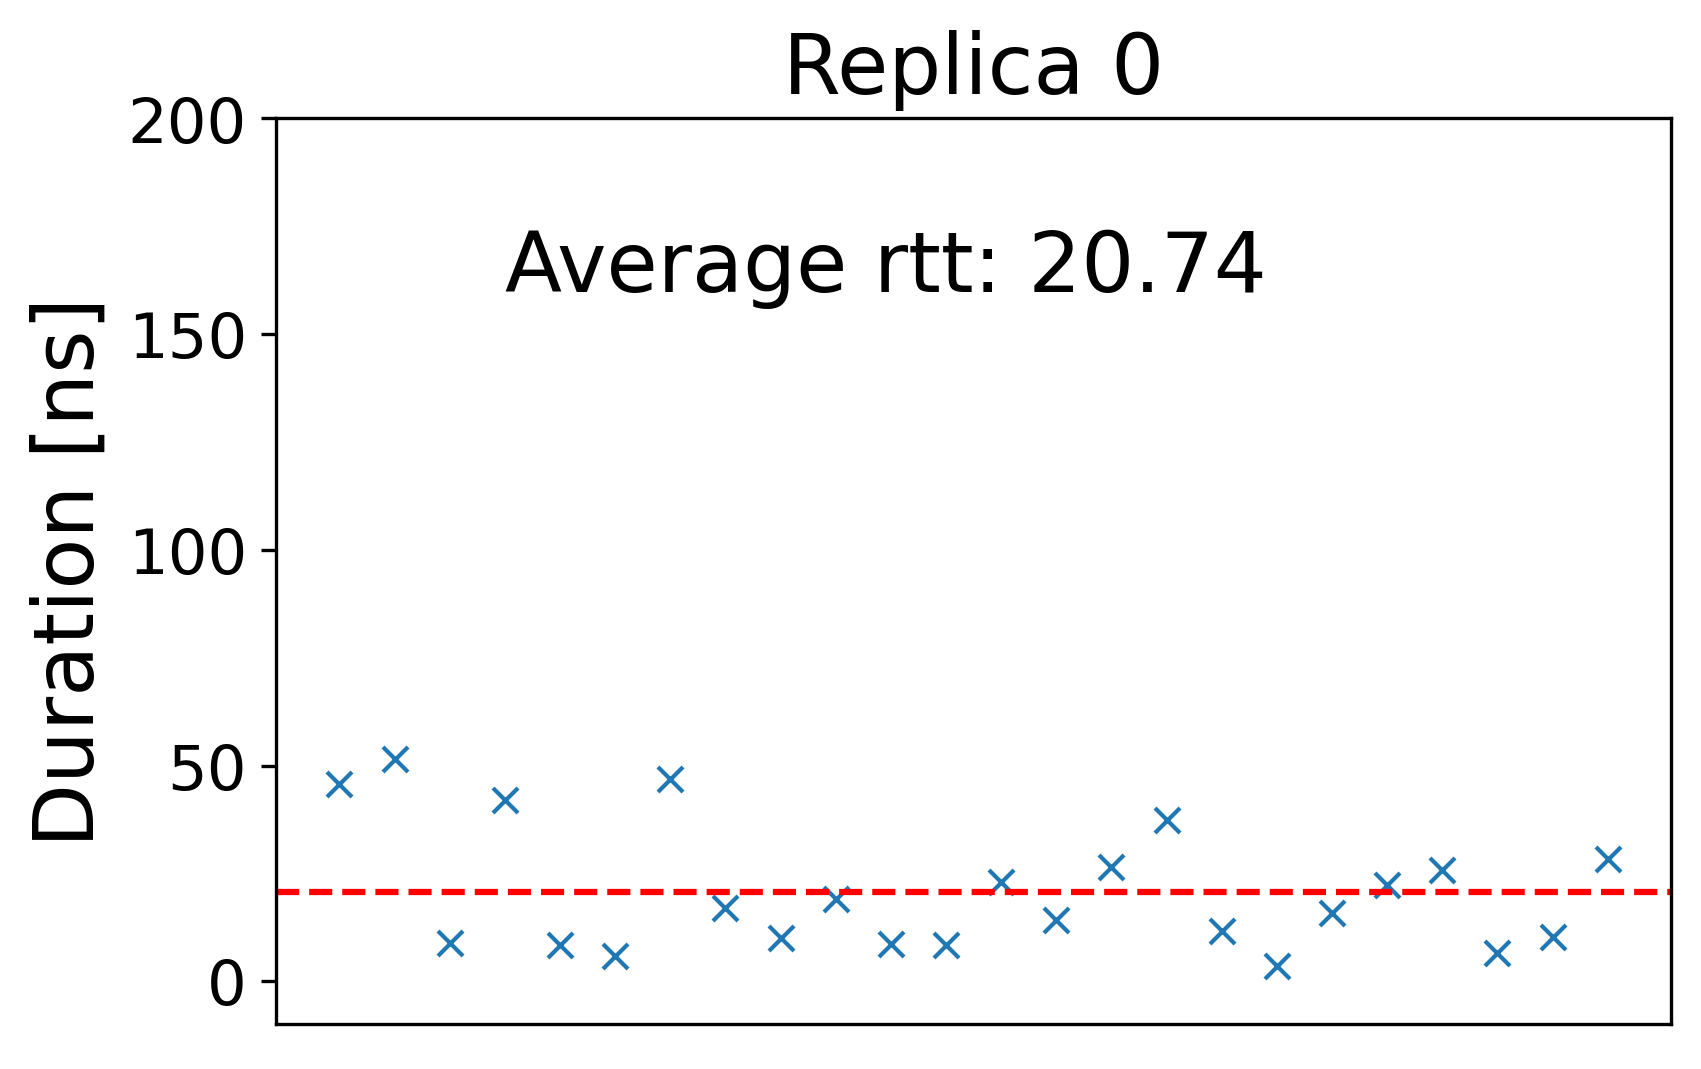

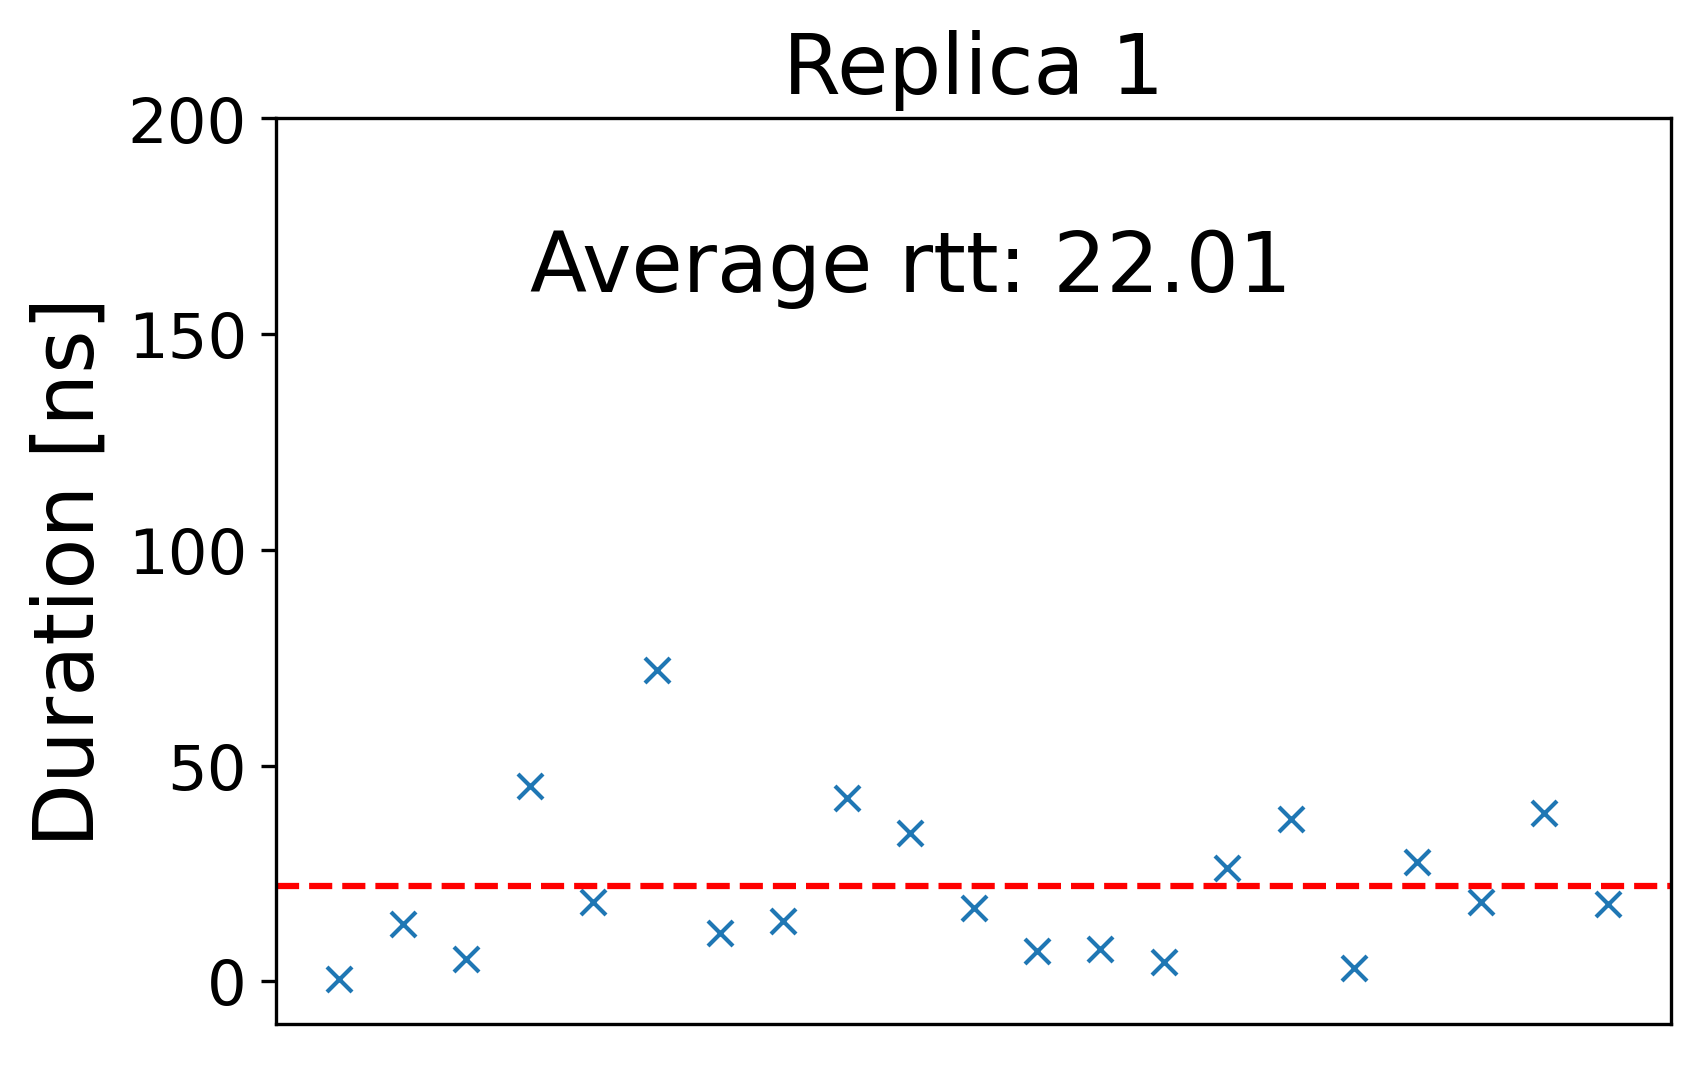

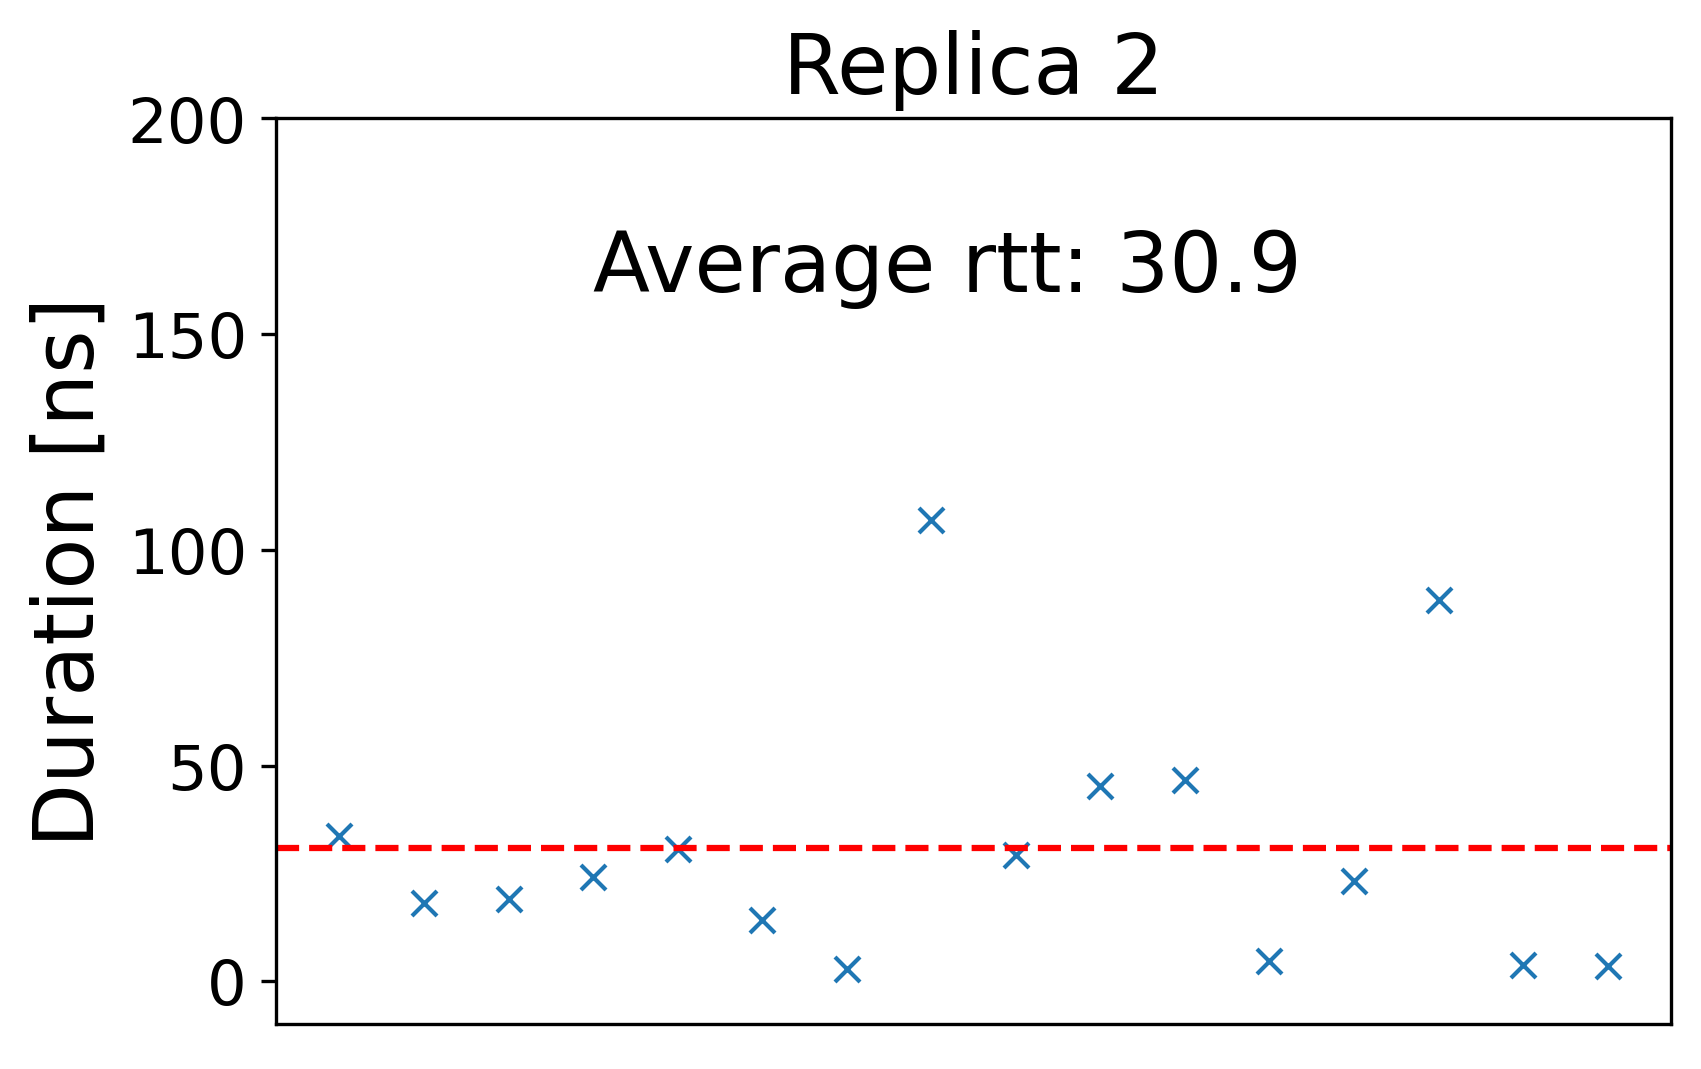

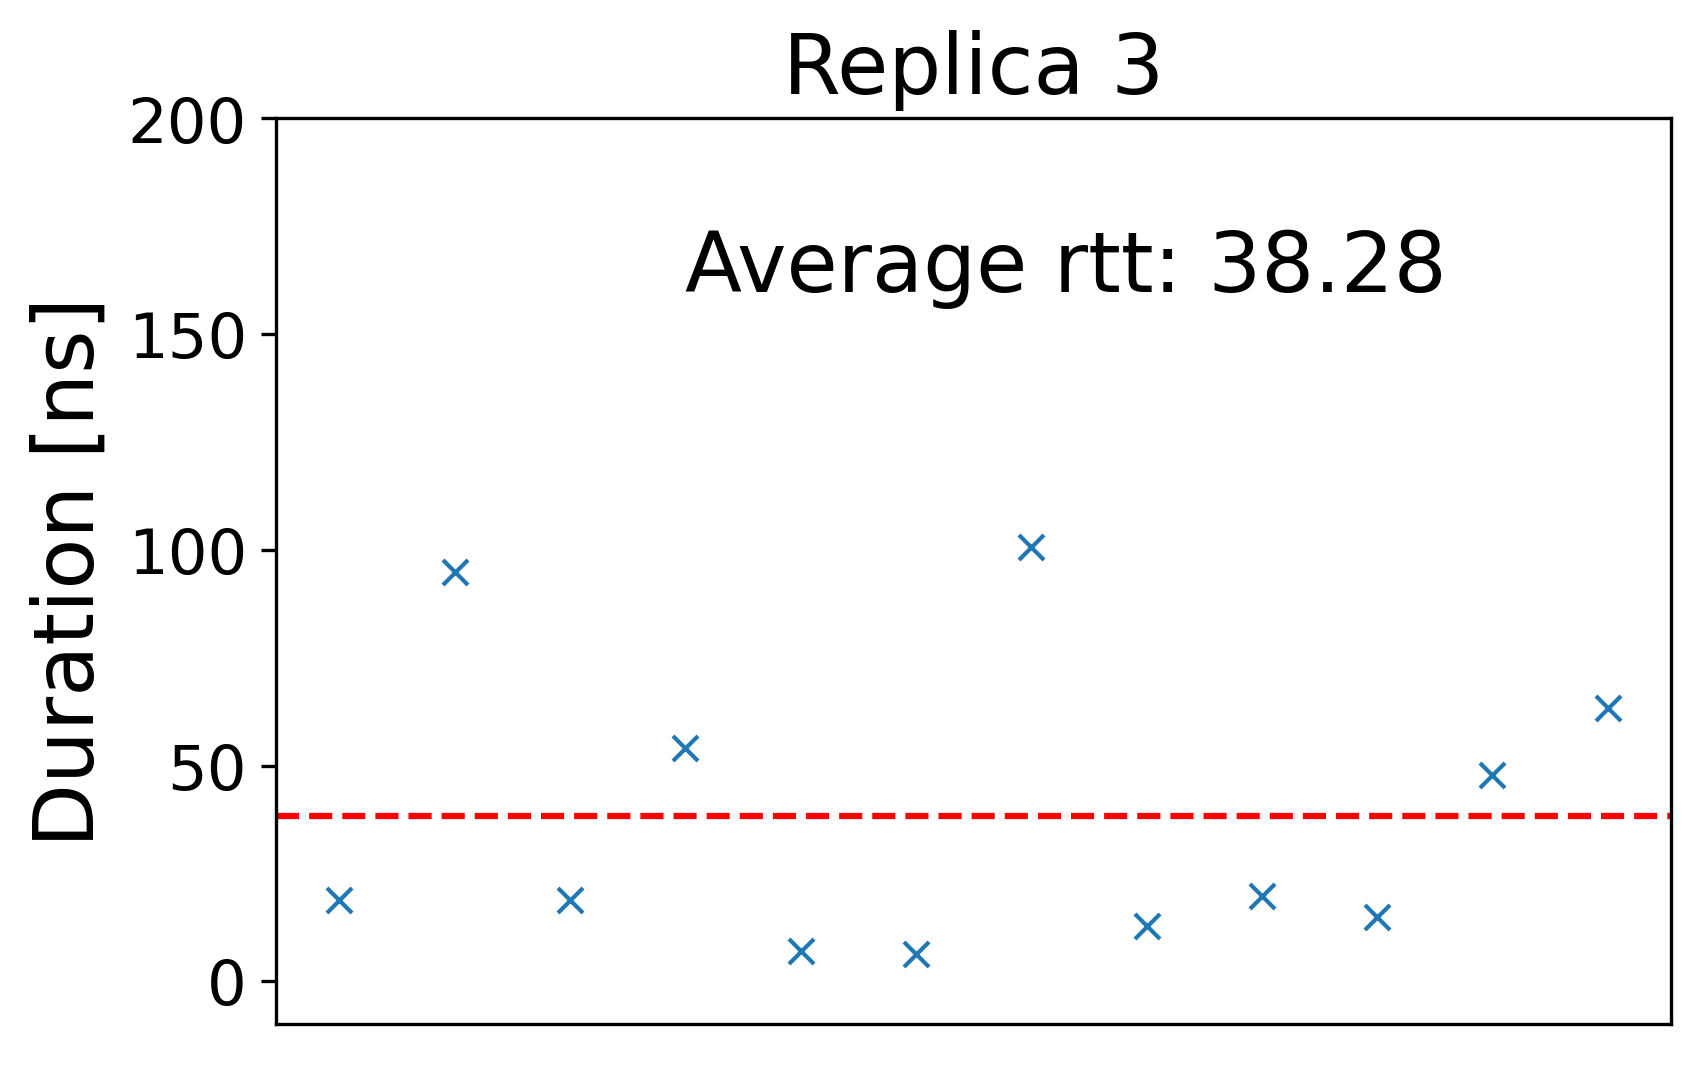

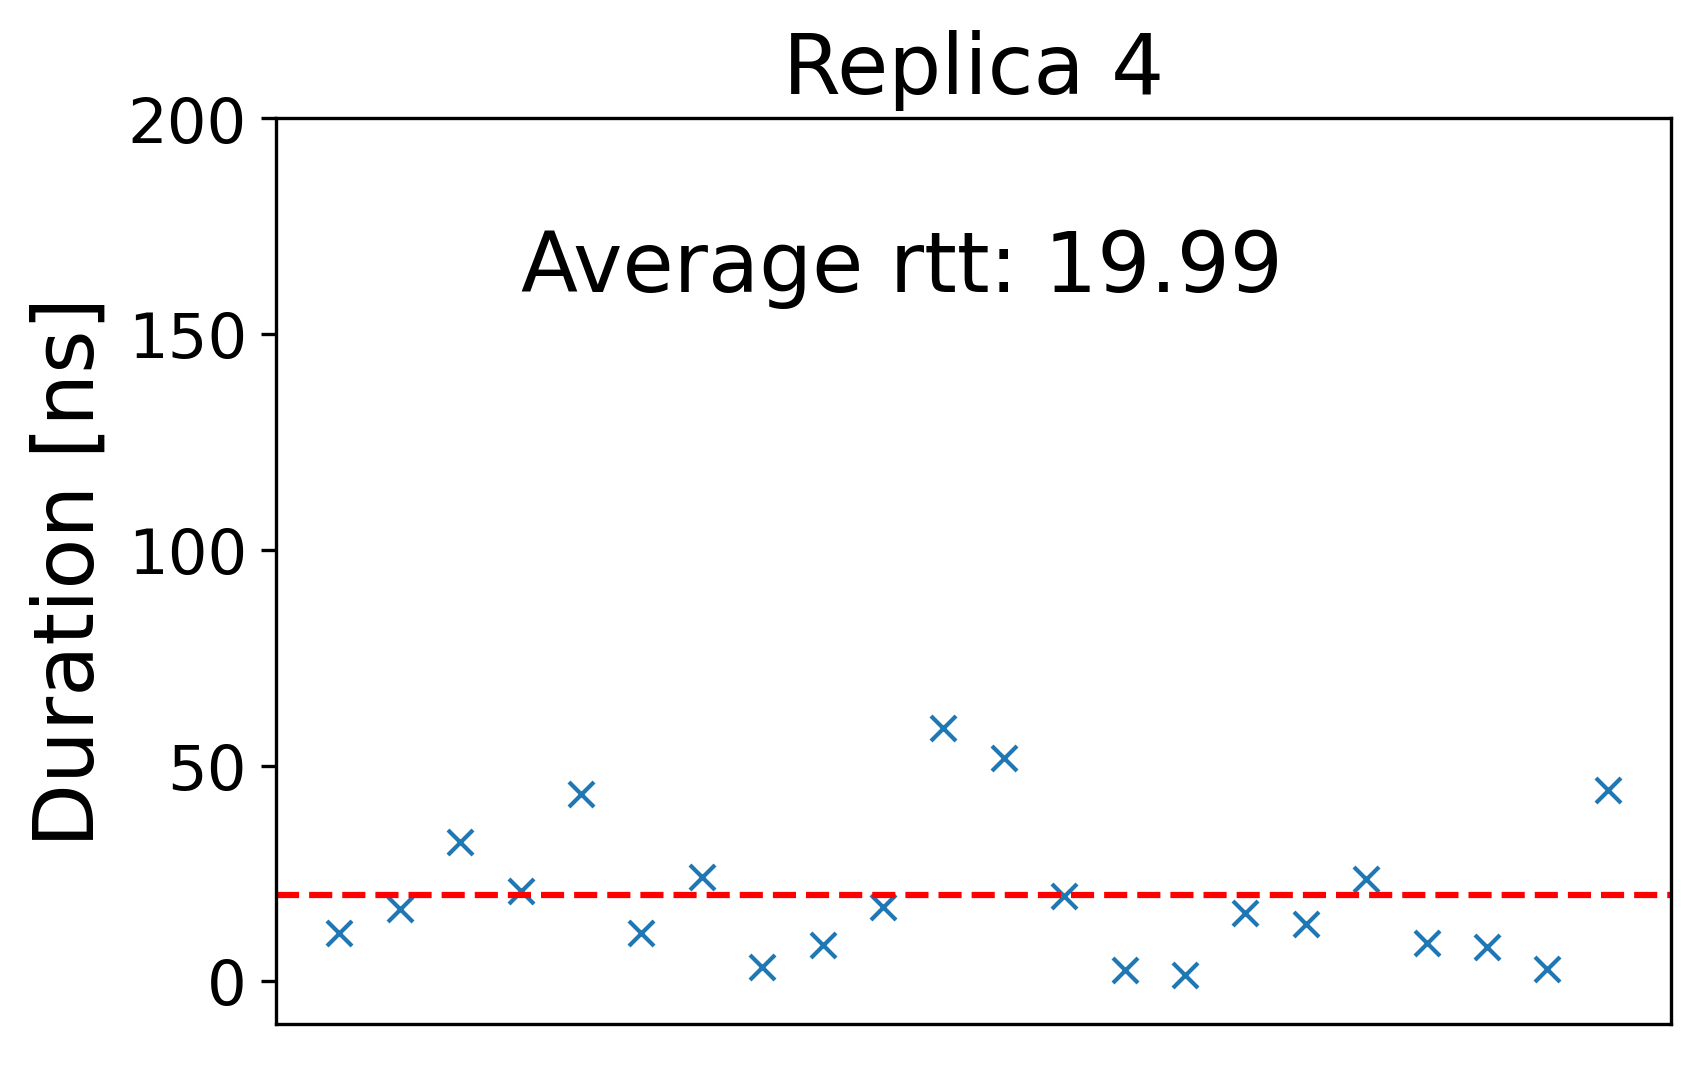

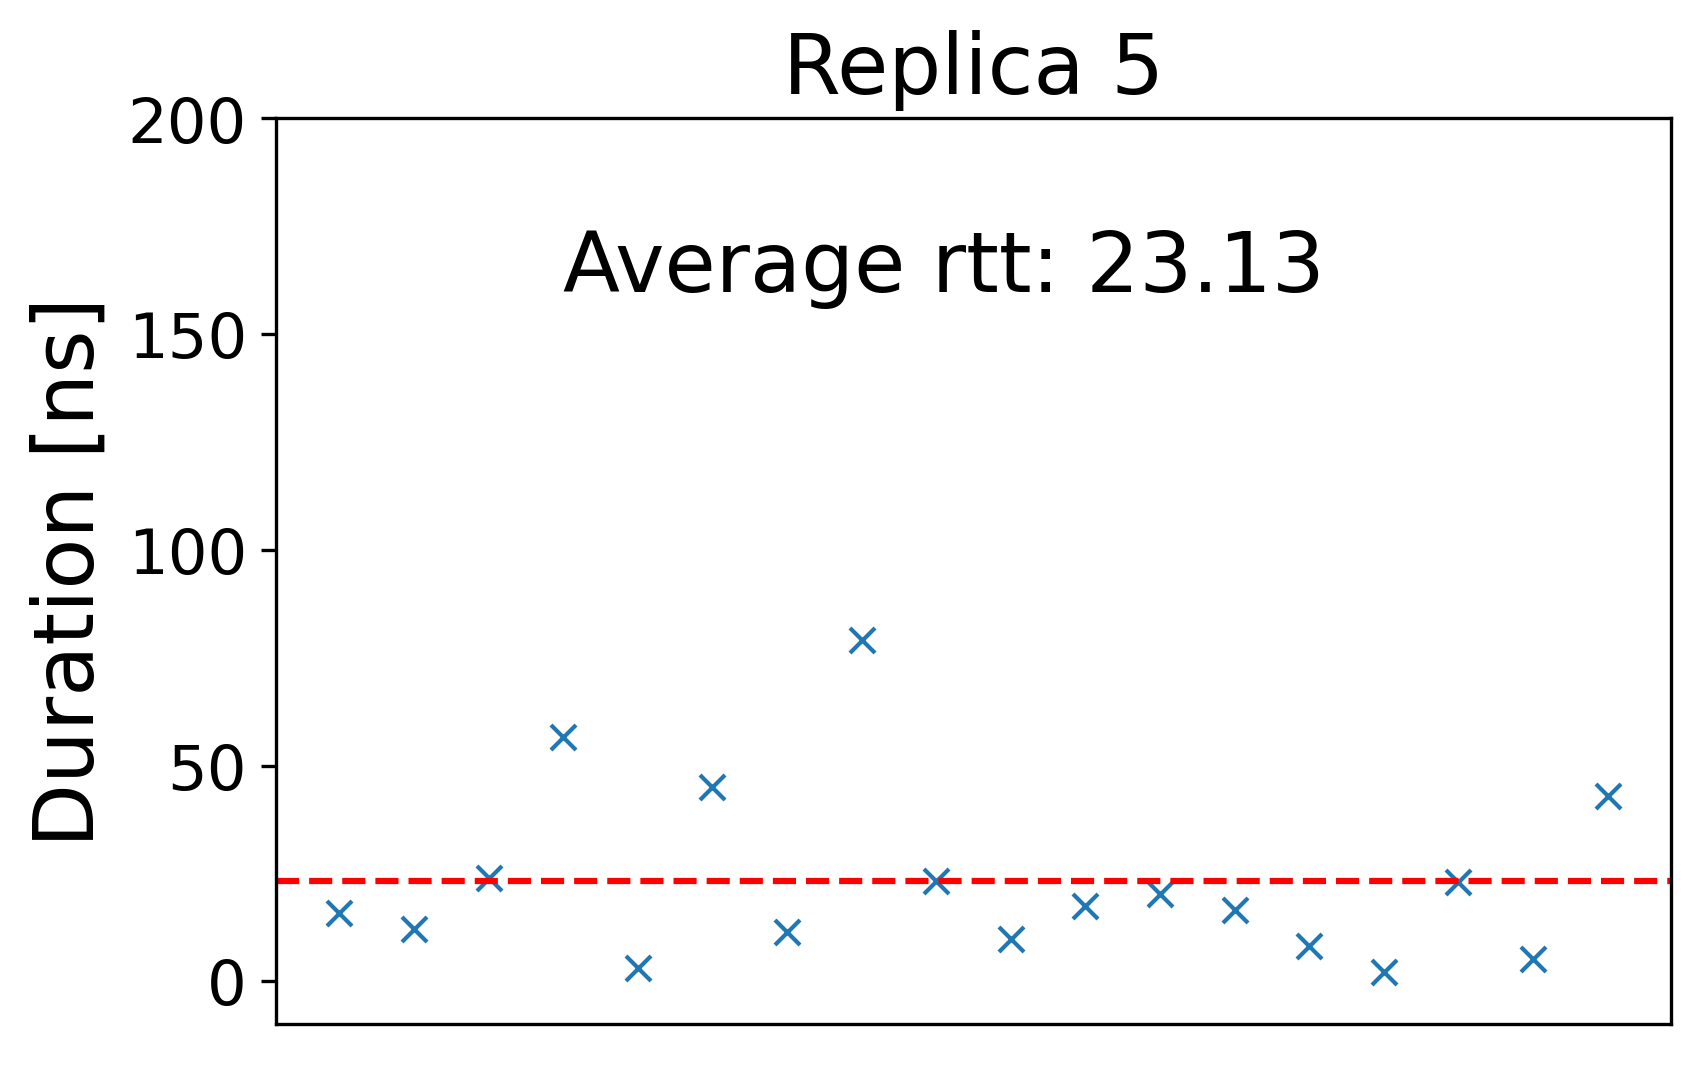

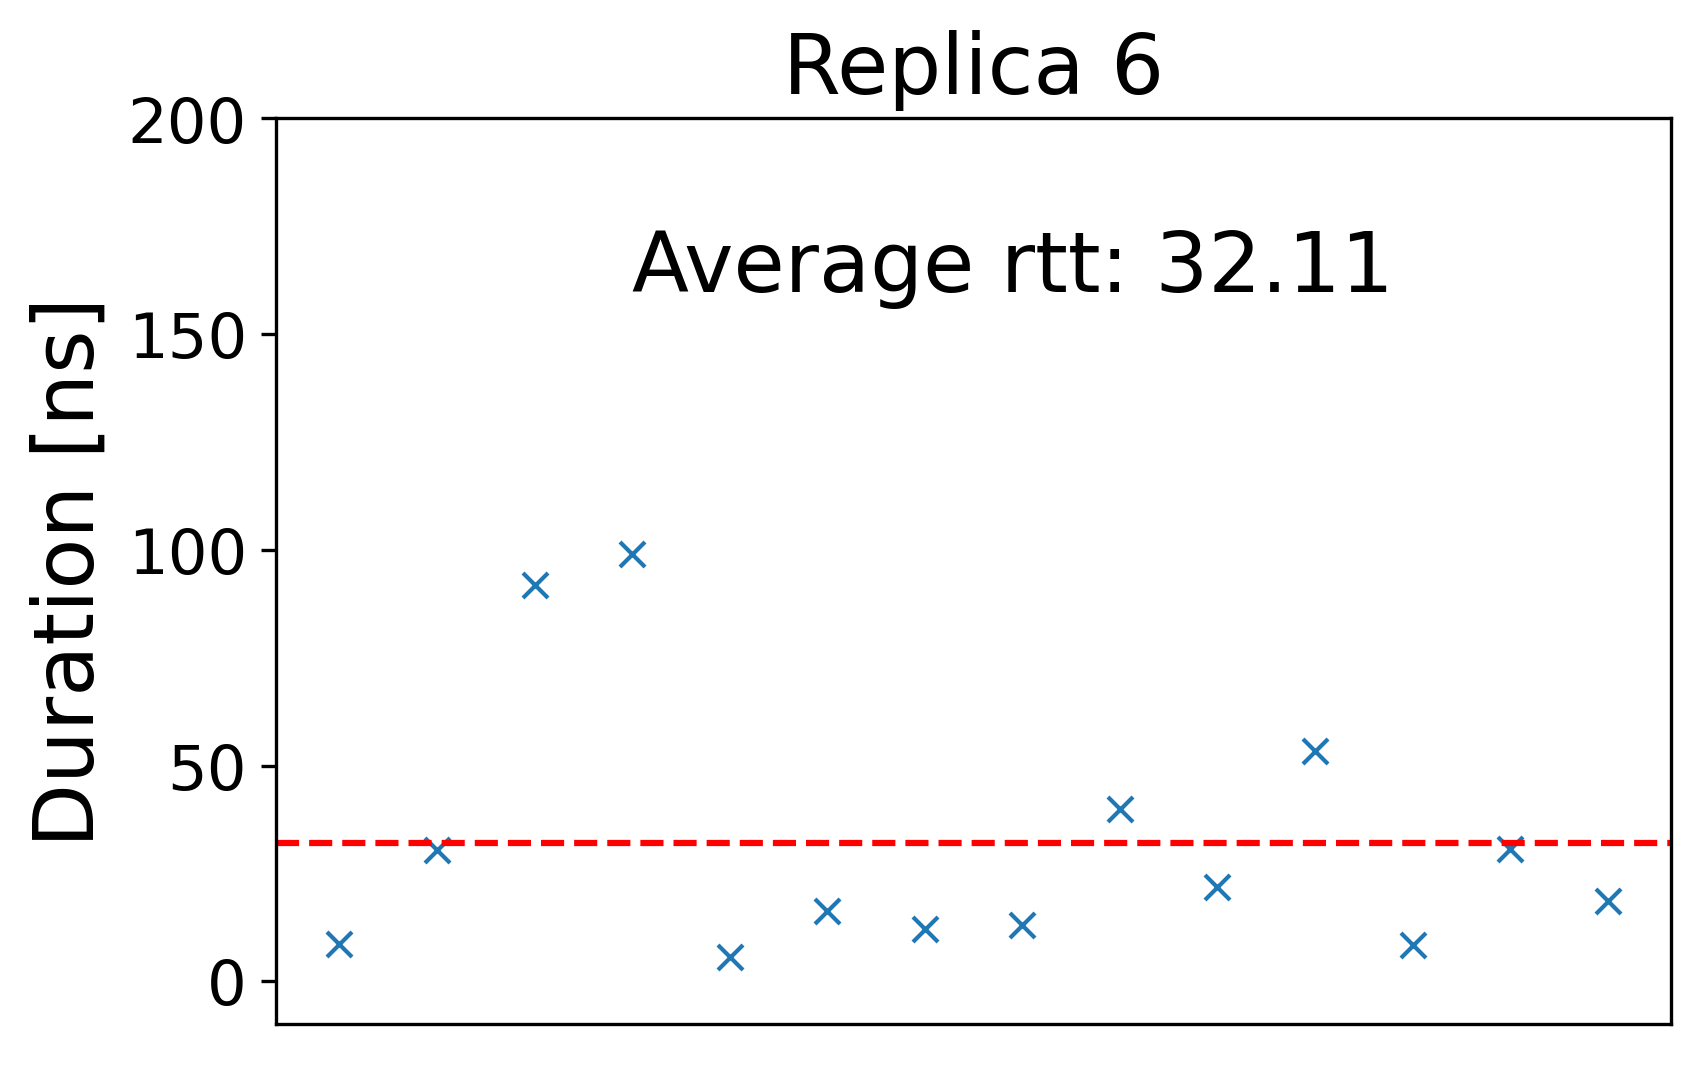

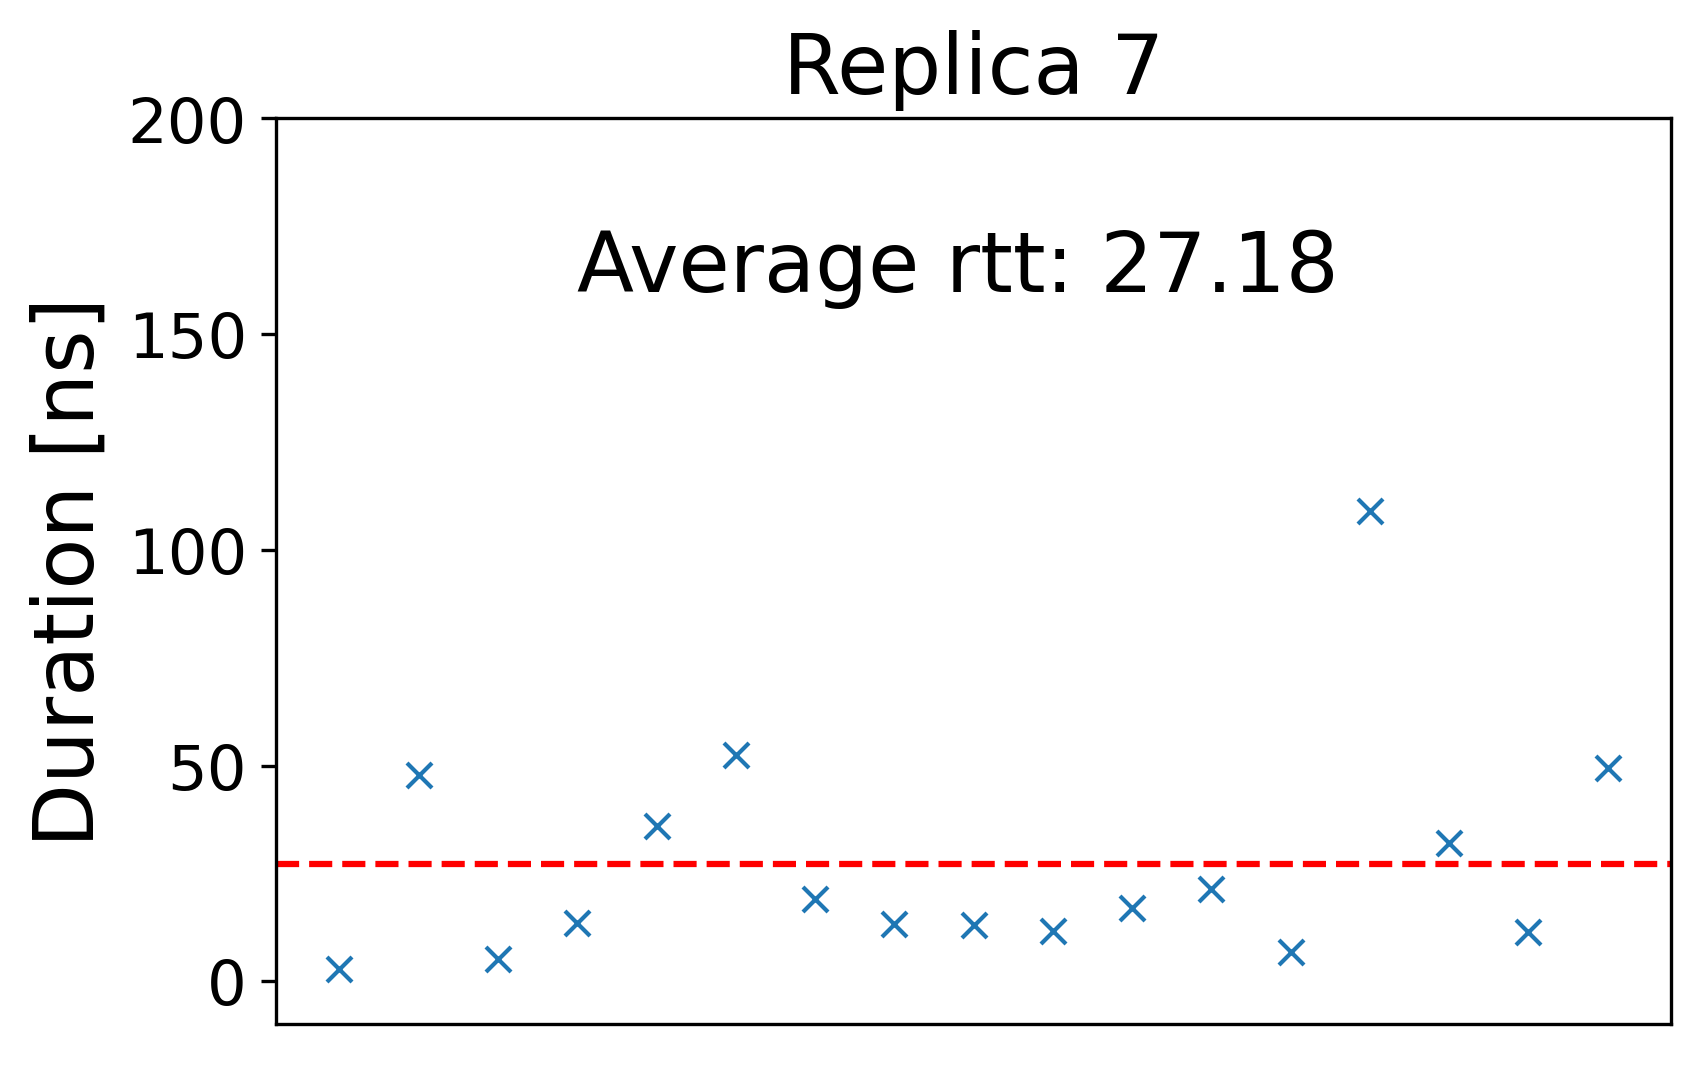

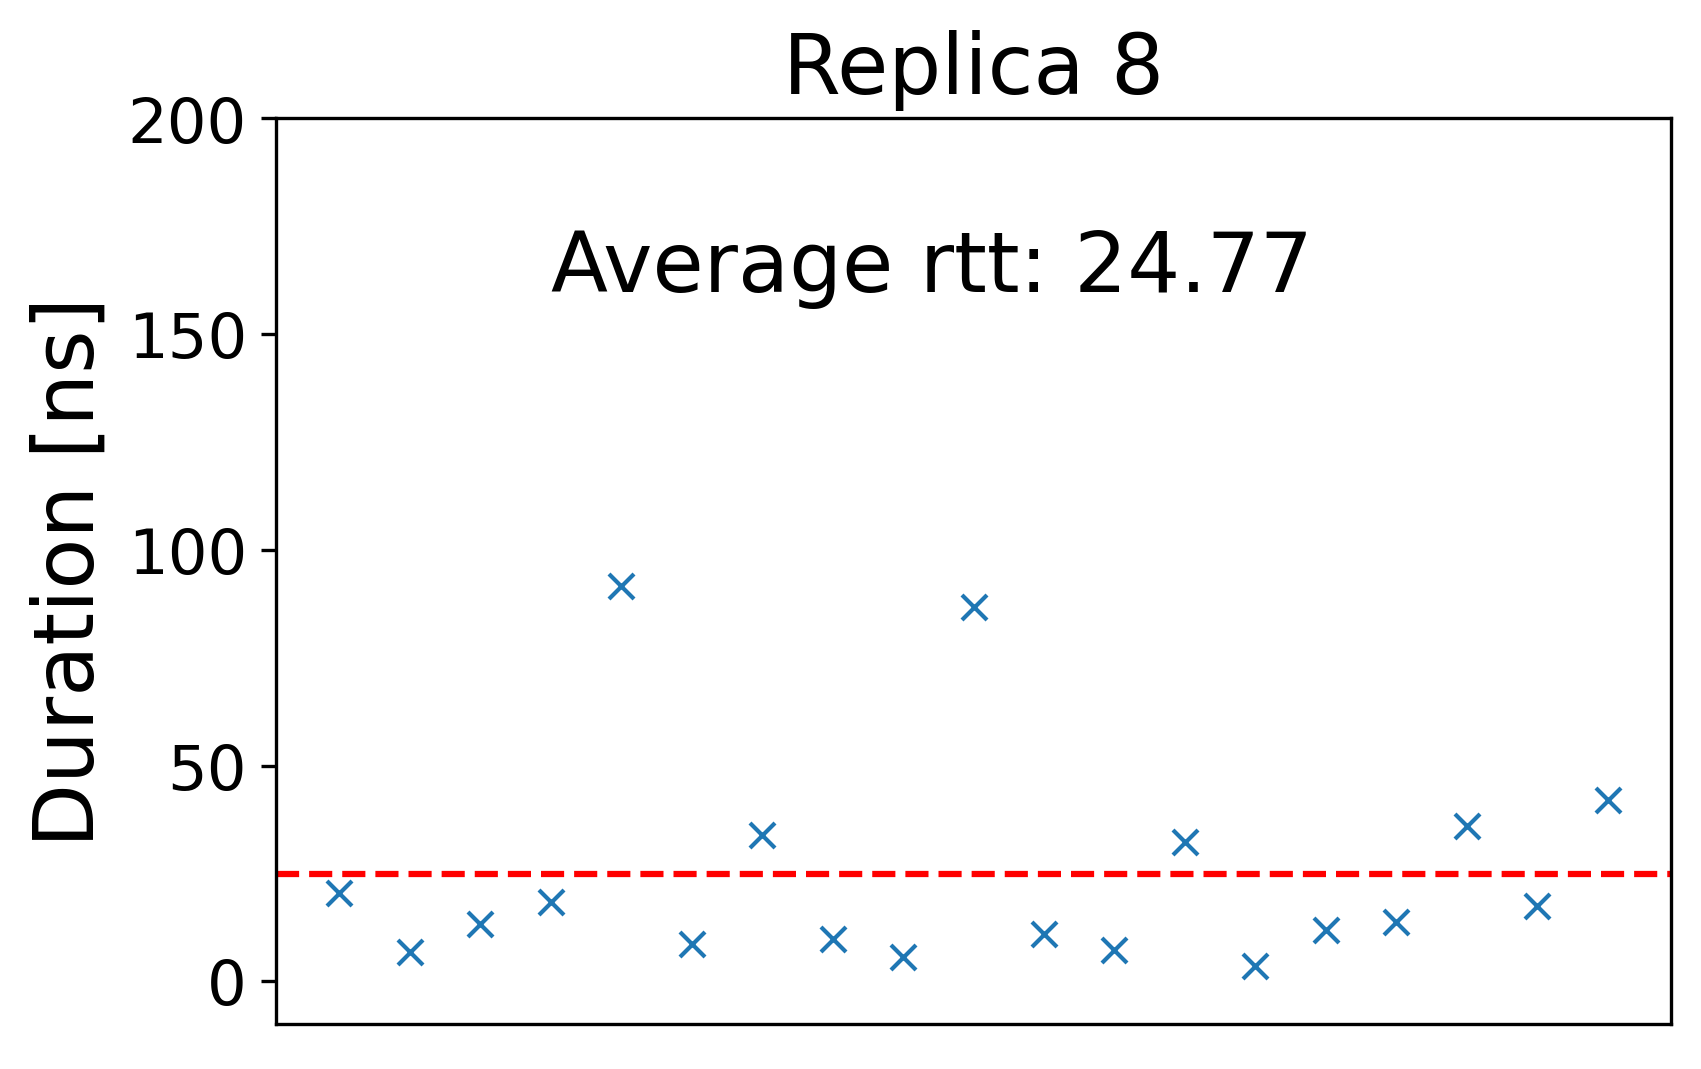

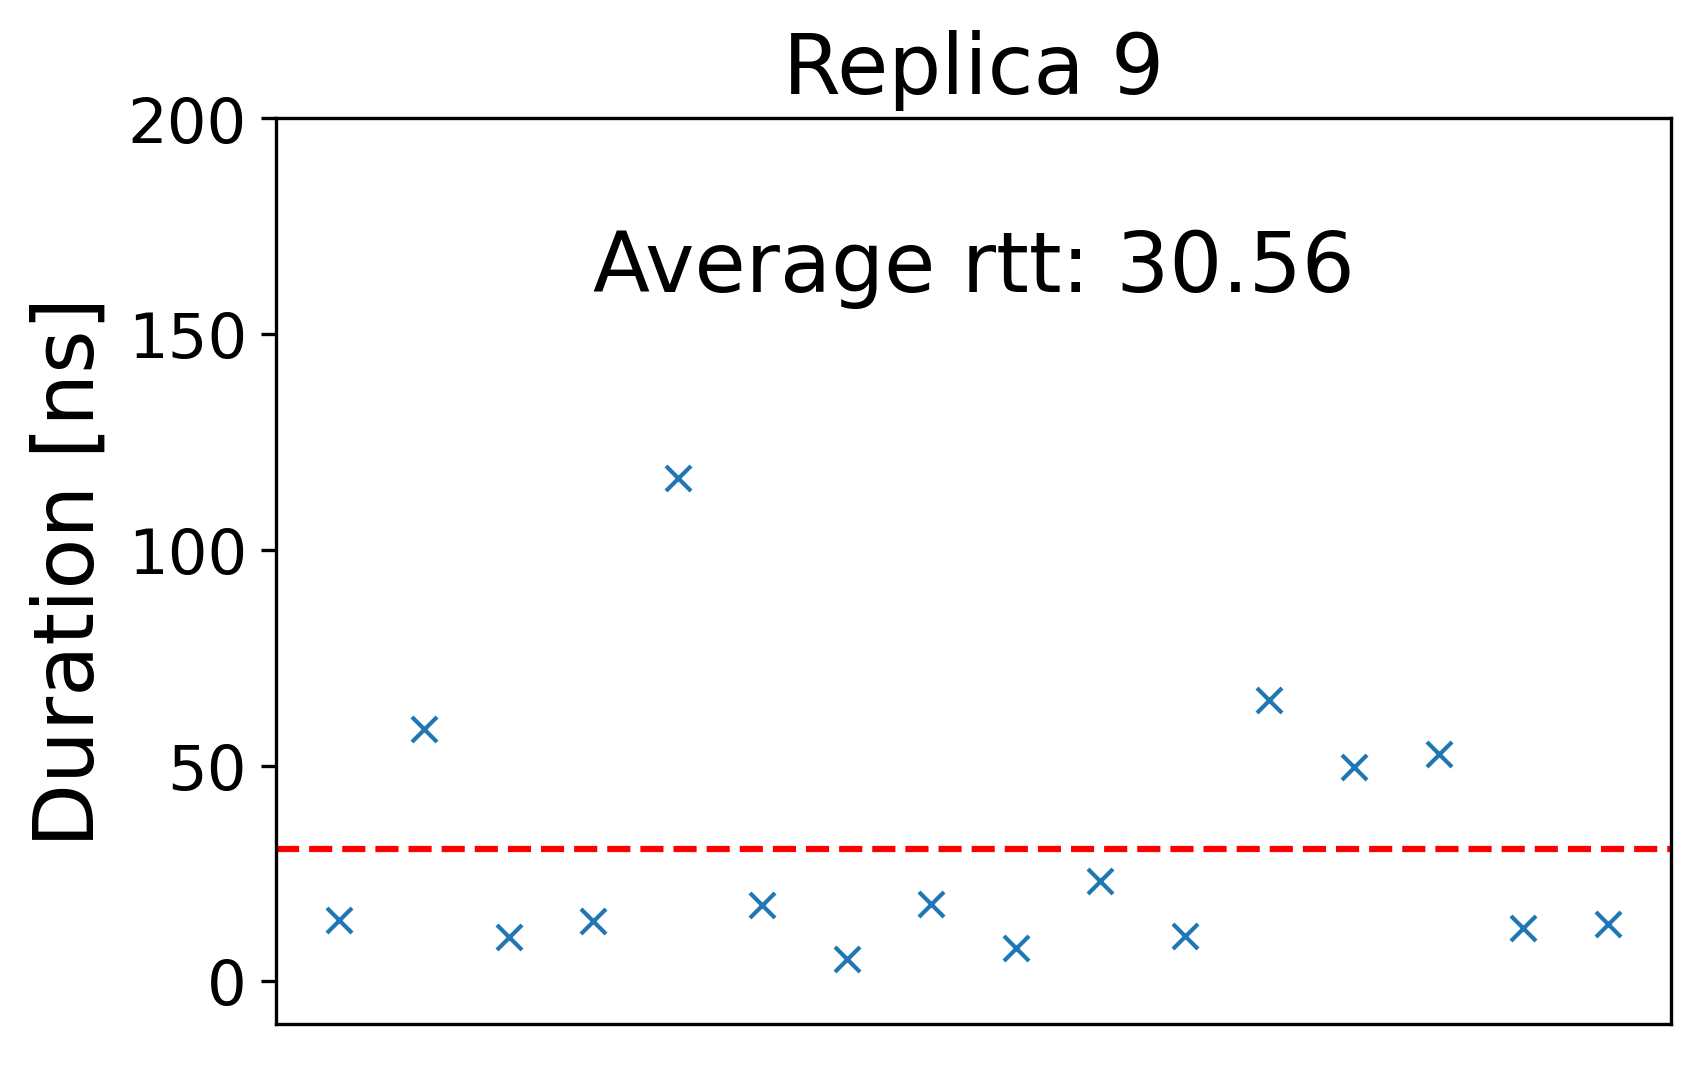

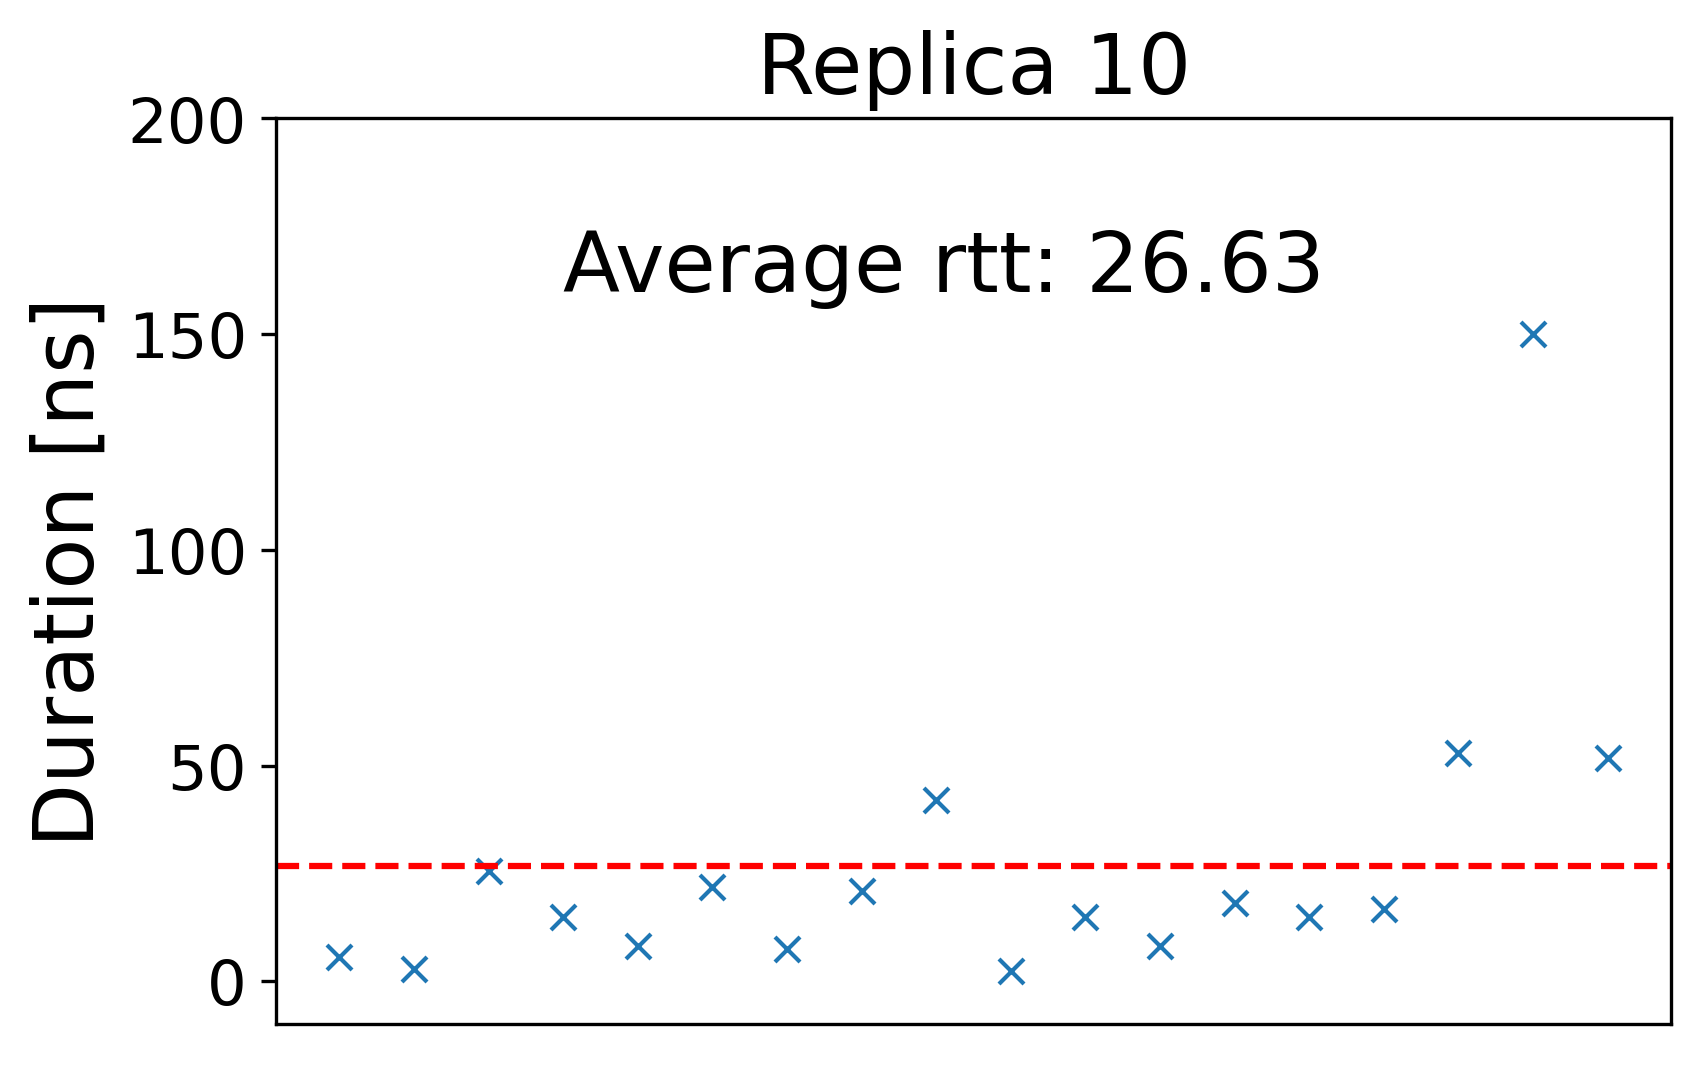

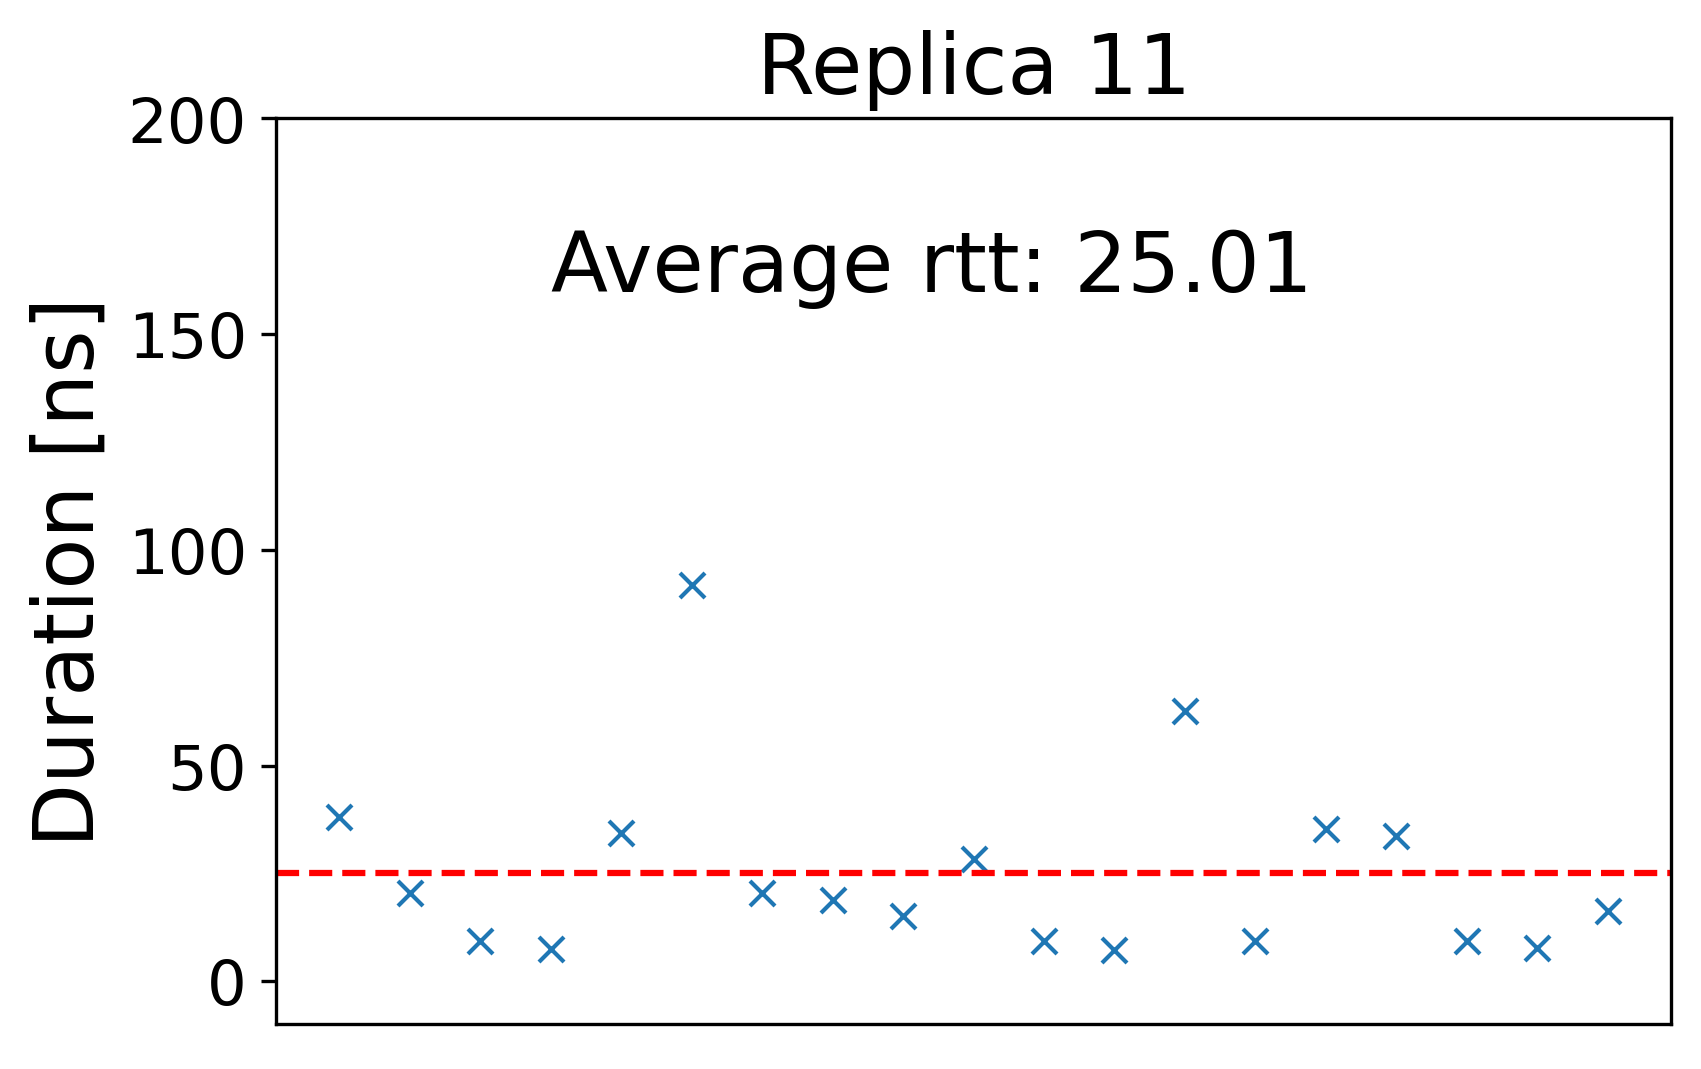

In [9]:
replica = 12 #Number of replicas
path = "Example_dataset/TOPO0"

plot.roundtriptime(replica, path)

## Construct free energy profiles by summing hills from replica 0 (unbiased)

A local Plumed executable is required to perform this step

In [6]:
features = ['phi1_2', 'psi1_2', 'phi2_3', 'psi2_3', 'phi3_8', 'psi3_8', 'omega3_8','phi8_9', 'psi8_9', 
            'phi9_10', 'psi9_10', 'phi10_11', 'psi10_11', 'omega10_11','phi3_4','psi3_4','phi4_5',
            'psi4_5', 'phi5_6', 'psi5_6', 'phi6_7', 'psi6_7', 'omega6_7']

import glob

for filen in glob.glob( "Example_dataset/TOPO0/HILLS_*.0") : 
    !ml foss && ml PLUMED && bash_scripts/sumhills.sh {filen} 1000 2.579
    !rm -rf {filen}_fes 
    !mkdir {filen}_fes 
    !mv fes_*.dat {filen}_fes

for f in features:
    process_files.rename_profiles("Example_dataset/TOPO0/HILLS_{}.0_fes/".format(f))
    process_files.shift_to_zero("Example_dataset/TOPO0/HILLS_{}.0_fes".format(f))

PLUMED: PLUMED is starting
PLUMED: Version: 2.6.2 (git: Unknown) compiled on Feb  9 2021 at 09:29:55
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/applications/EasyBuild-Ivybridge-NEW/software/PLUMED/2.6.2-foss-2020a-Python-3.8.2/lib/plumed
PLUMED: For installed feature, see /home/applications/EasyBuild-Ivybridge-NEW/software/PLUMED/2.6.2-foss-2020a-Python-3.8.2/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput.

PLUMED:   done with this chunk: now with 38000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_37.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 39000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_38.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 40000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_39.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 41000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_40.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 42000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_41.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 43000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_42.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

limit_output extension: Maximum message size of 10000 exceeded with 10141 characters

## Plot free energy profiles along torsion angles

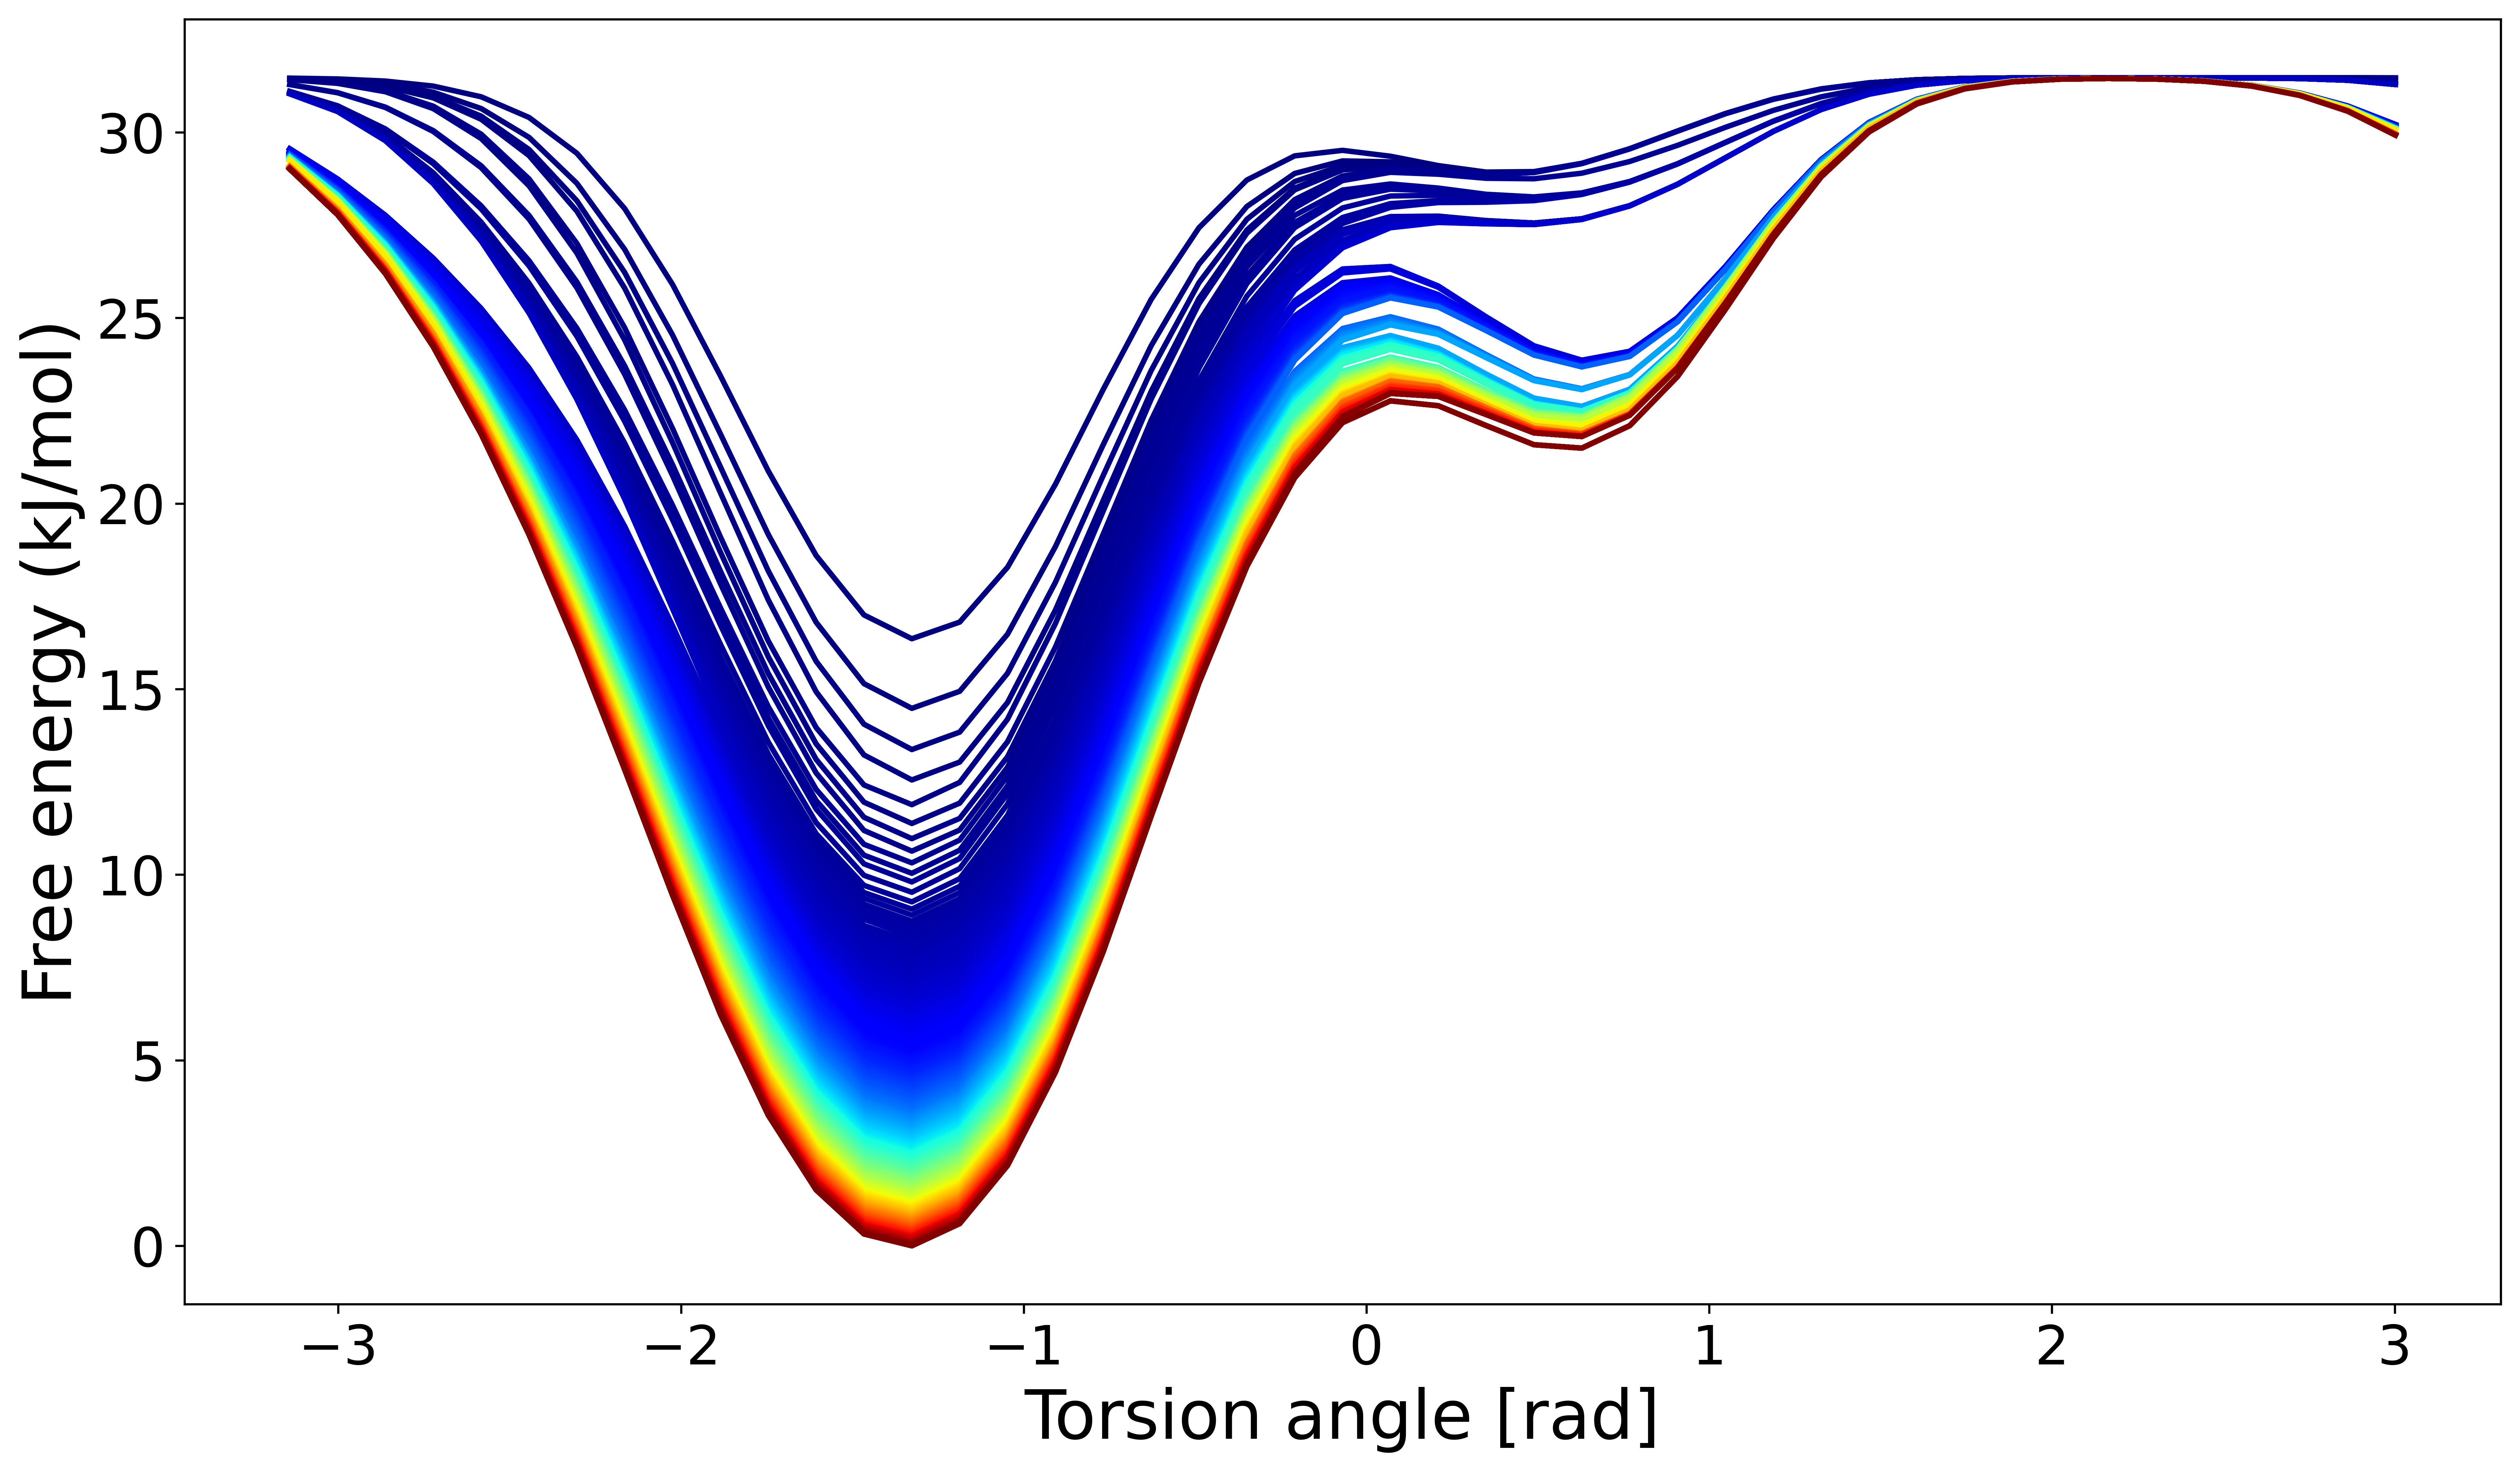

In [18]:
path = "Example_dataset/TOPO0/HILLS_phi1_2.0_fes/"
plot.free_energy(path)

## Plot 2D free energy profile along pucker coordinates phi and theta

/home/grothaus-2/Documents/Simulations/Sugar/models/Github-upload/GlyCONFORMER/plot.py:130: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(Y, X, Z, cmap=plt.cm.jet, vmin = 0, vmax = 40)


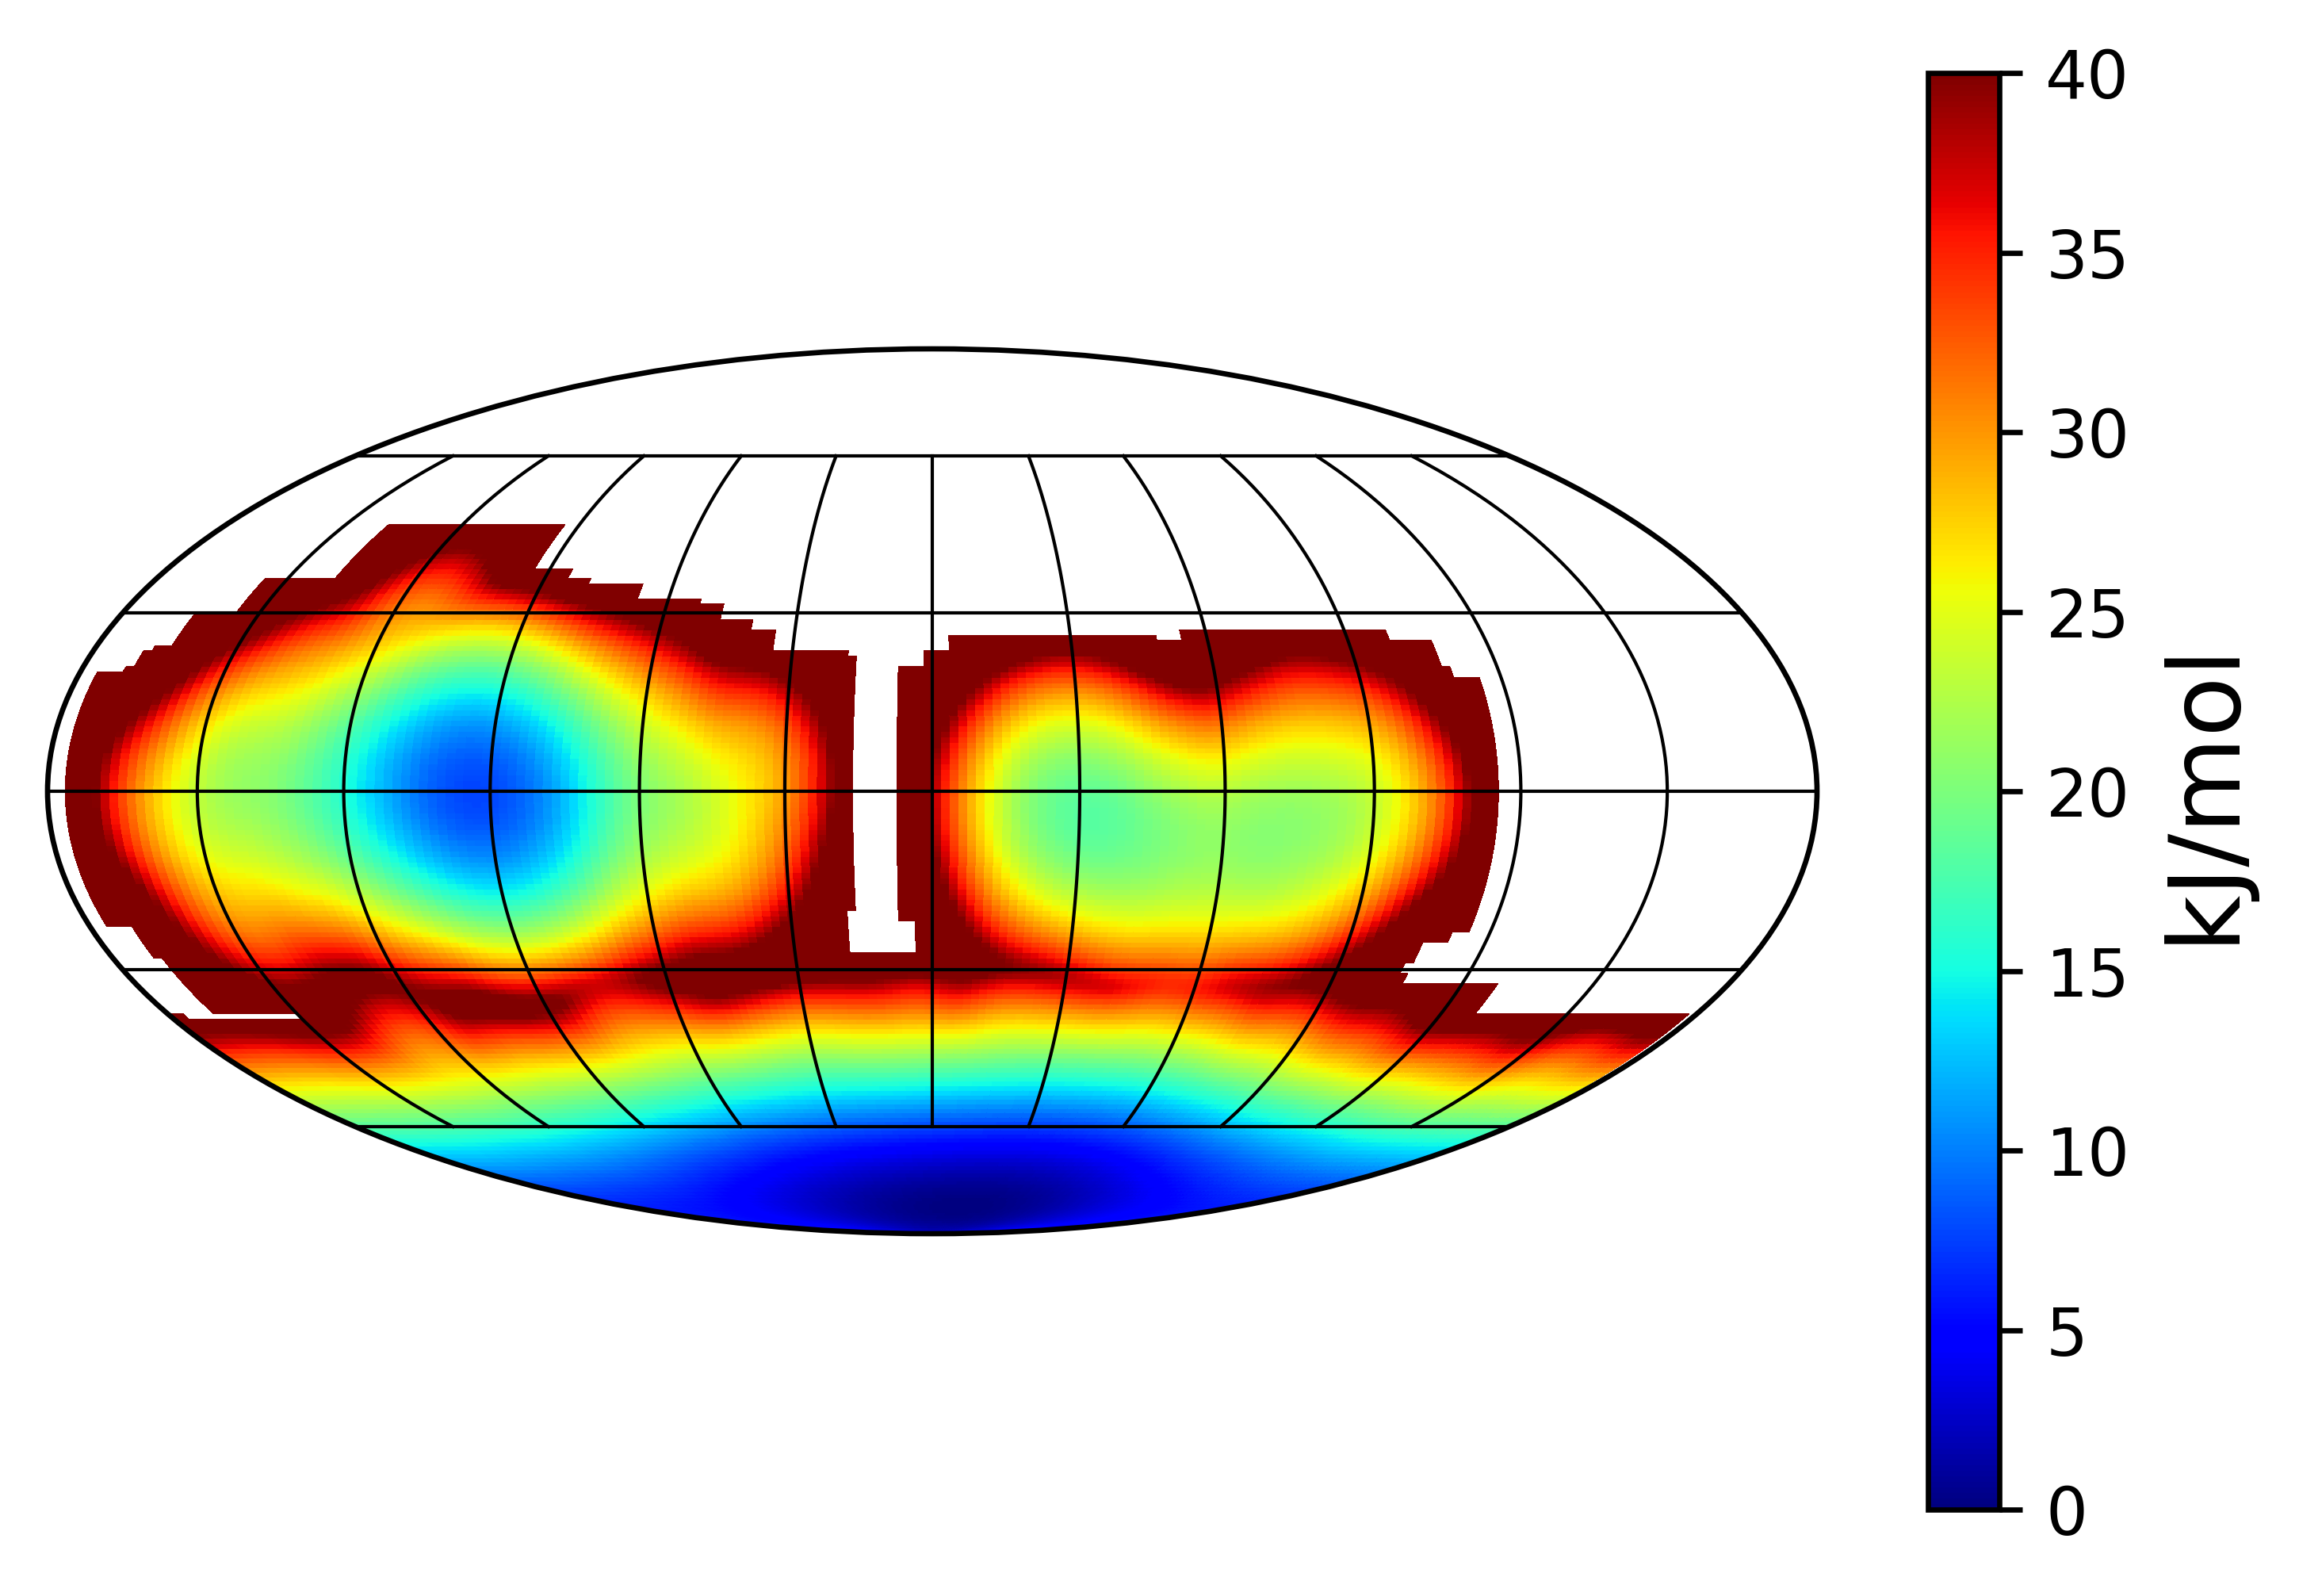

In [19]:
path = "Example_dataset/TOPO0/FEP_pucker"
file = "ffpucker2.dat"
shape = [200,201]

plot.twodim_pucker(path, file, shape)

## Construct and plot conformer distribution

In [20]:
features = ['phi1_2', 'psi1_2', 'phi2_3', 'psi2_3', 'phi3_8', 'psi3_8', 'omega3_8','phi8_9', 'psi8_9', 
            'phi9_10', 'psi9_10', 'phi10_11', 'psi10_11', 'omega10_11','phi3_4','psi3_4','phi4_5',
            'psi4_5', 'phi5_6', 'psi5_6', 'phi6_7', 'psi6_7', 'omega6_7']

In [21]:
!mkdir Example_dataset/TOPO0/Conformer_population
for f in features :  
    !cp Example_dataset/TOPO0/HILLS_{f}.0_fes/fes_00500.dat Example_dataset/TOPO0/Conformer_population/fes_{f}.dat

mkdir: cannot create directory ‘Example_dataset/TOPO0/Conformer_population’: File exists


/home/grothaus-2/Documents/Simulations/Sugar/models/Github-upload/GlyCONFORMER/glycan_conformer.py:417: UserWarning: cannot load PLUMED instance, conversions will not be available
  colvar = plumed.read_as_pandas(colvar_dir)
/home/grothaus-2/Documents/Simulations/Sugar/models/Github-upload/GlyCONFORMER/glycan_conformer.py:421: UserWarning: cannot load PLUMED instance, conversions will not be available
  c = plumed.read_as_pandas(colvar_dir)


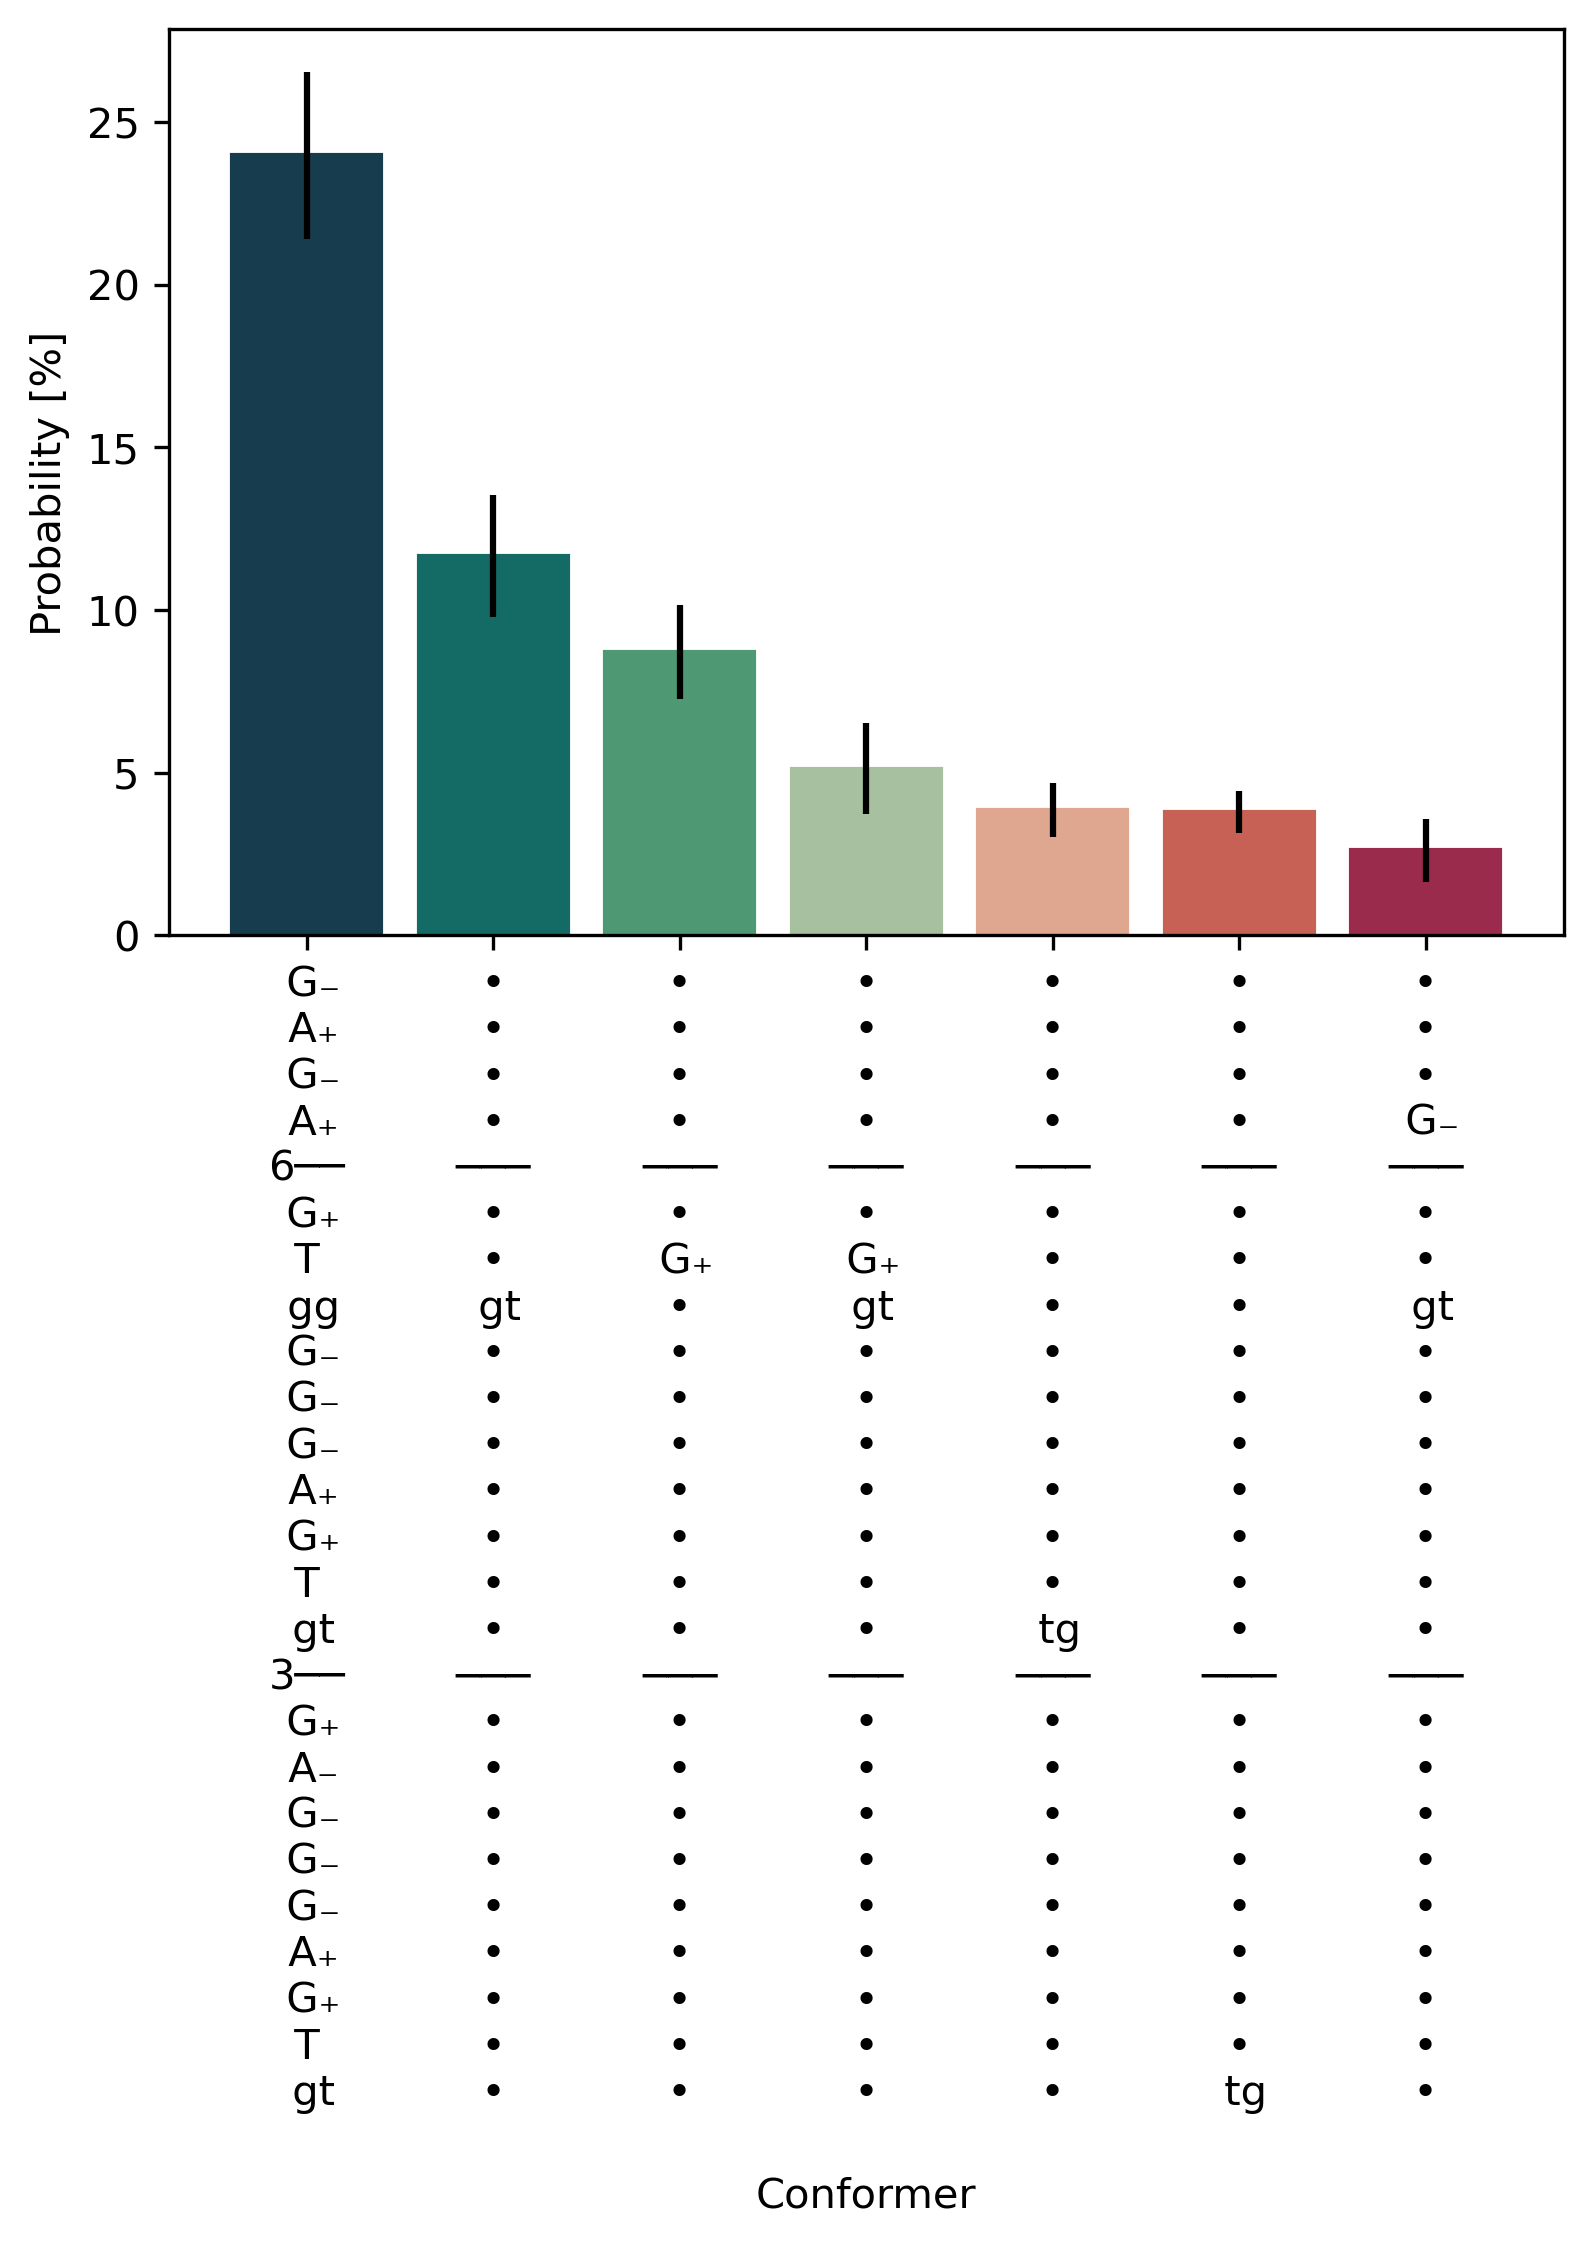

In [22]:
features = ['phi1_2', 'psi1_2', 'phi2_3', 'psi2_3', 'phi3_8', 'psi3_8', 'omega3_8','phi8_9', 'psi8_9', 
            'phi9_10', 'psi9_10', 'phi10_11', 'psi10_11', 'omega10_11','phi3_4','psi3_4','phi4_5',
            'psi4_5', 'phi5_6', 'psi5_6', 'phi6_7', 'psi6_7', 'omega6_7']

input_dir = "Example_dataset/TOPO0/Conformer_population"
colvar_dir = "Example_dataset/TOPO0/COLVAR.0"
colvar_length = 62501
f_omega = ['omega3_8', 'omega10_11', 'omega6_7']
limit = 0.025

maxima_dict, minima_dict = glycan_conformer.find_min_max(input_dir, features, 5, 5)
label_dict = glycan_conformer.label_min(minima_dict, features, f_omega)

glycan_conformer.safe_dict(maxima_dict, "Example_dataset/TOPO0/Conformer_population/maxima.txt")
glycan_conformer.safe_dict(minima_dict, "Example_dataset/TOPO0/Conformer_population/minima.txt")
glycan_conformer.safe_dict(label_dict, "Example_dataset/TOPO0/Conformer_population/label.txt")

c_binary, c_conformer, features, branches = glycan_conformer.create_binary(maxima_dict, label_dict, 
                                                                                    colvar_dir, input_dir, colvar_length, features, 
                                                                                    loc1 = 4, loc2 = 14)
glycan_conformer.perform_block_averages(c_binary,c_conformer,input_dir)
glycan_conformer.plot_distribution(input_dir, limit, branches, features)

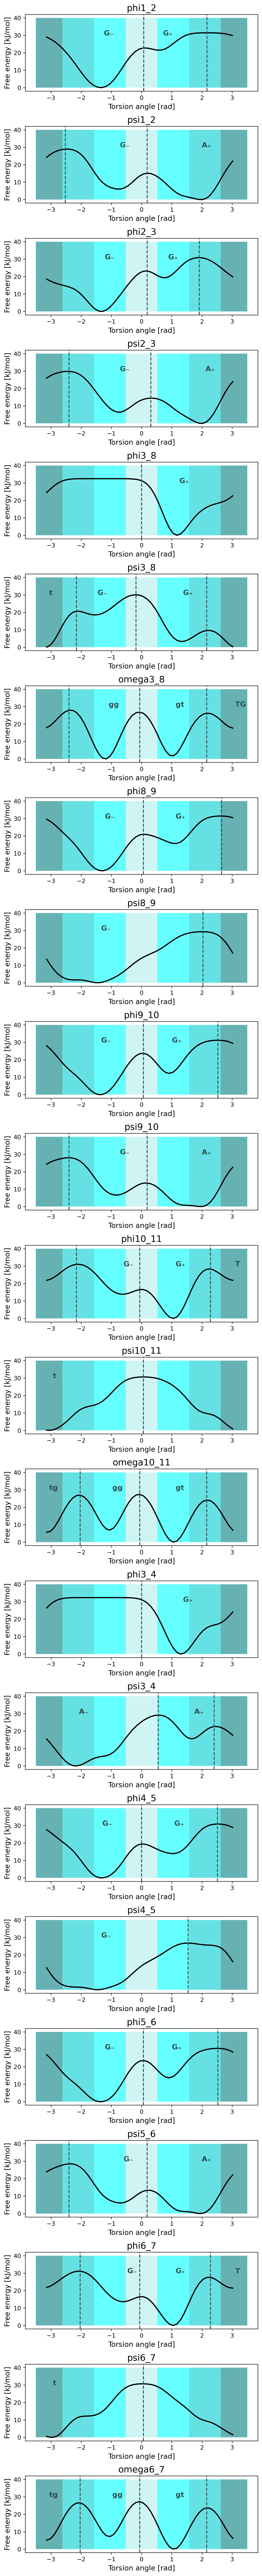

In [23]:
features = ['phi1_2', 'psi1_2', 'phi2_3', 'psi2_3', 'phi3_8', 'psi3_8', 'omega3_8','phi8_9', 'psi8_9', 'phi9_10', 'psi9_10', 'phi10_11', 'psi10_11', 'omega10_11','phi3_4','psi3_4','phi4_5', 'psi4_5', 'phi5_6', 'psi5_6', 'phi6_7', 'psi6_7', 'omega6_7']
plot.graph_eval(input_dir, features, maxima_dict, minima_dict, label_dict)

## Plot convergence plots 

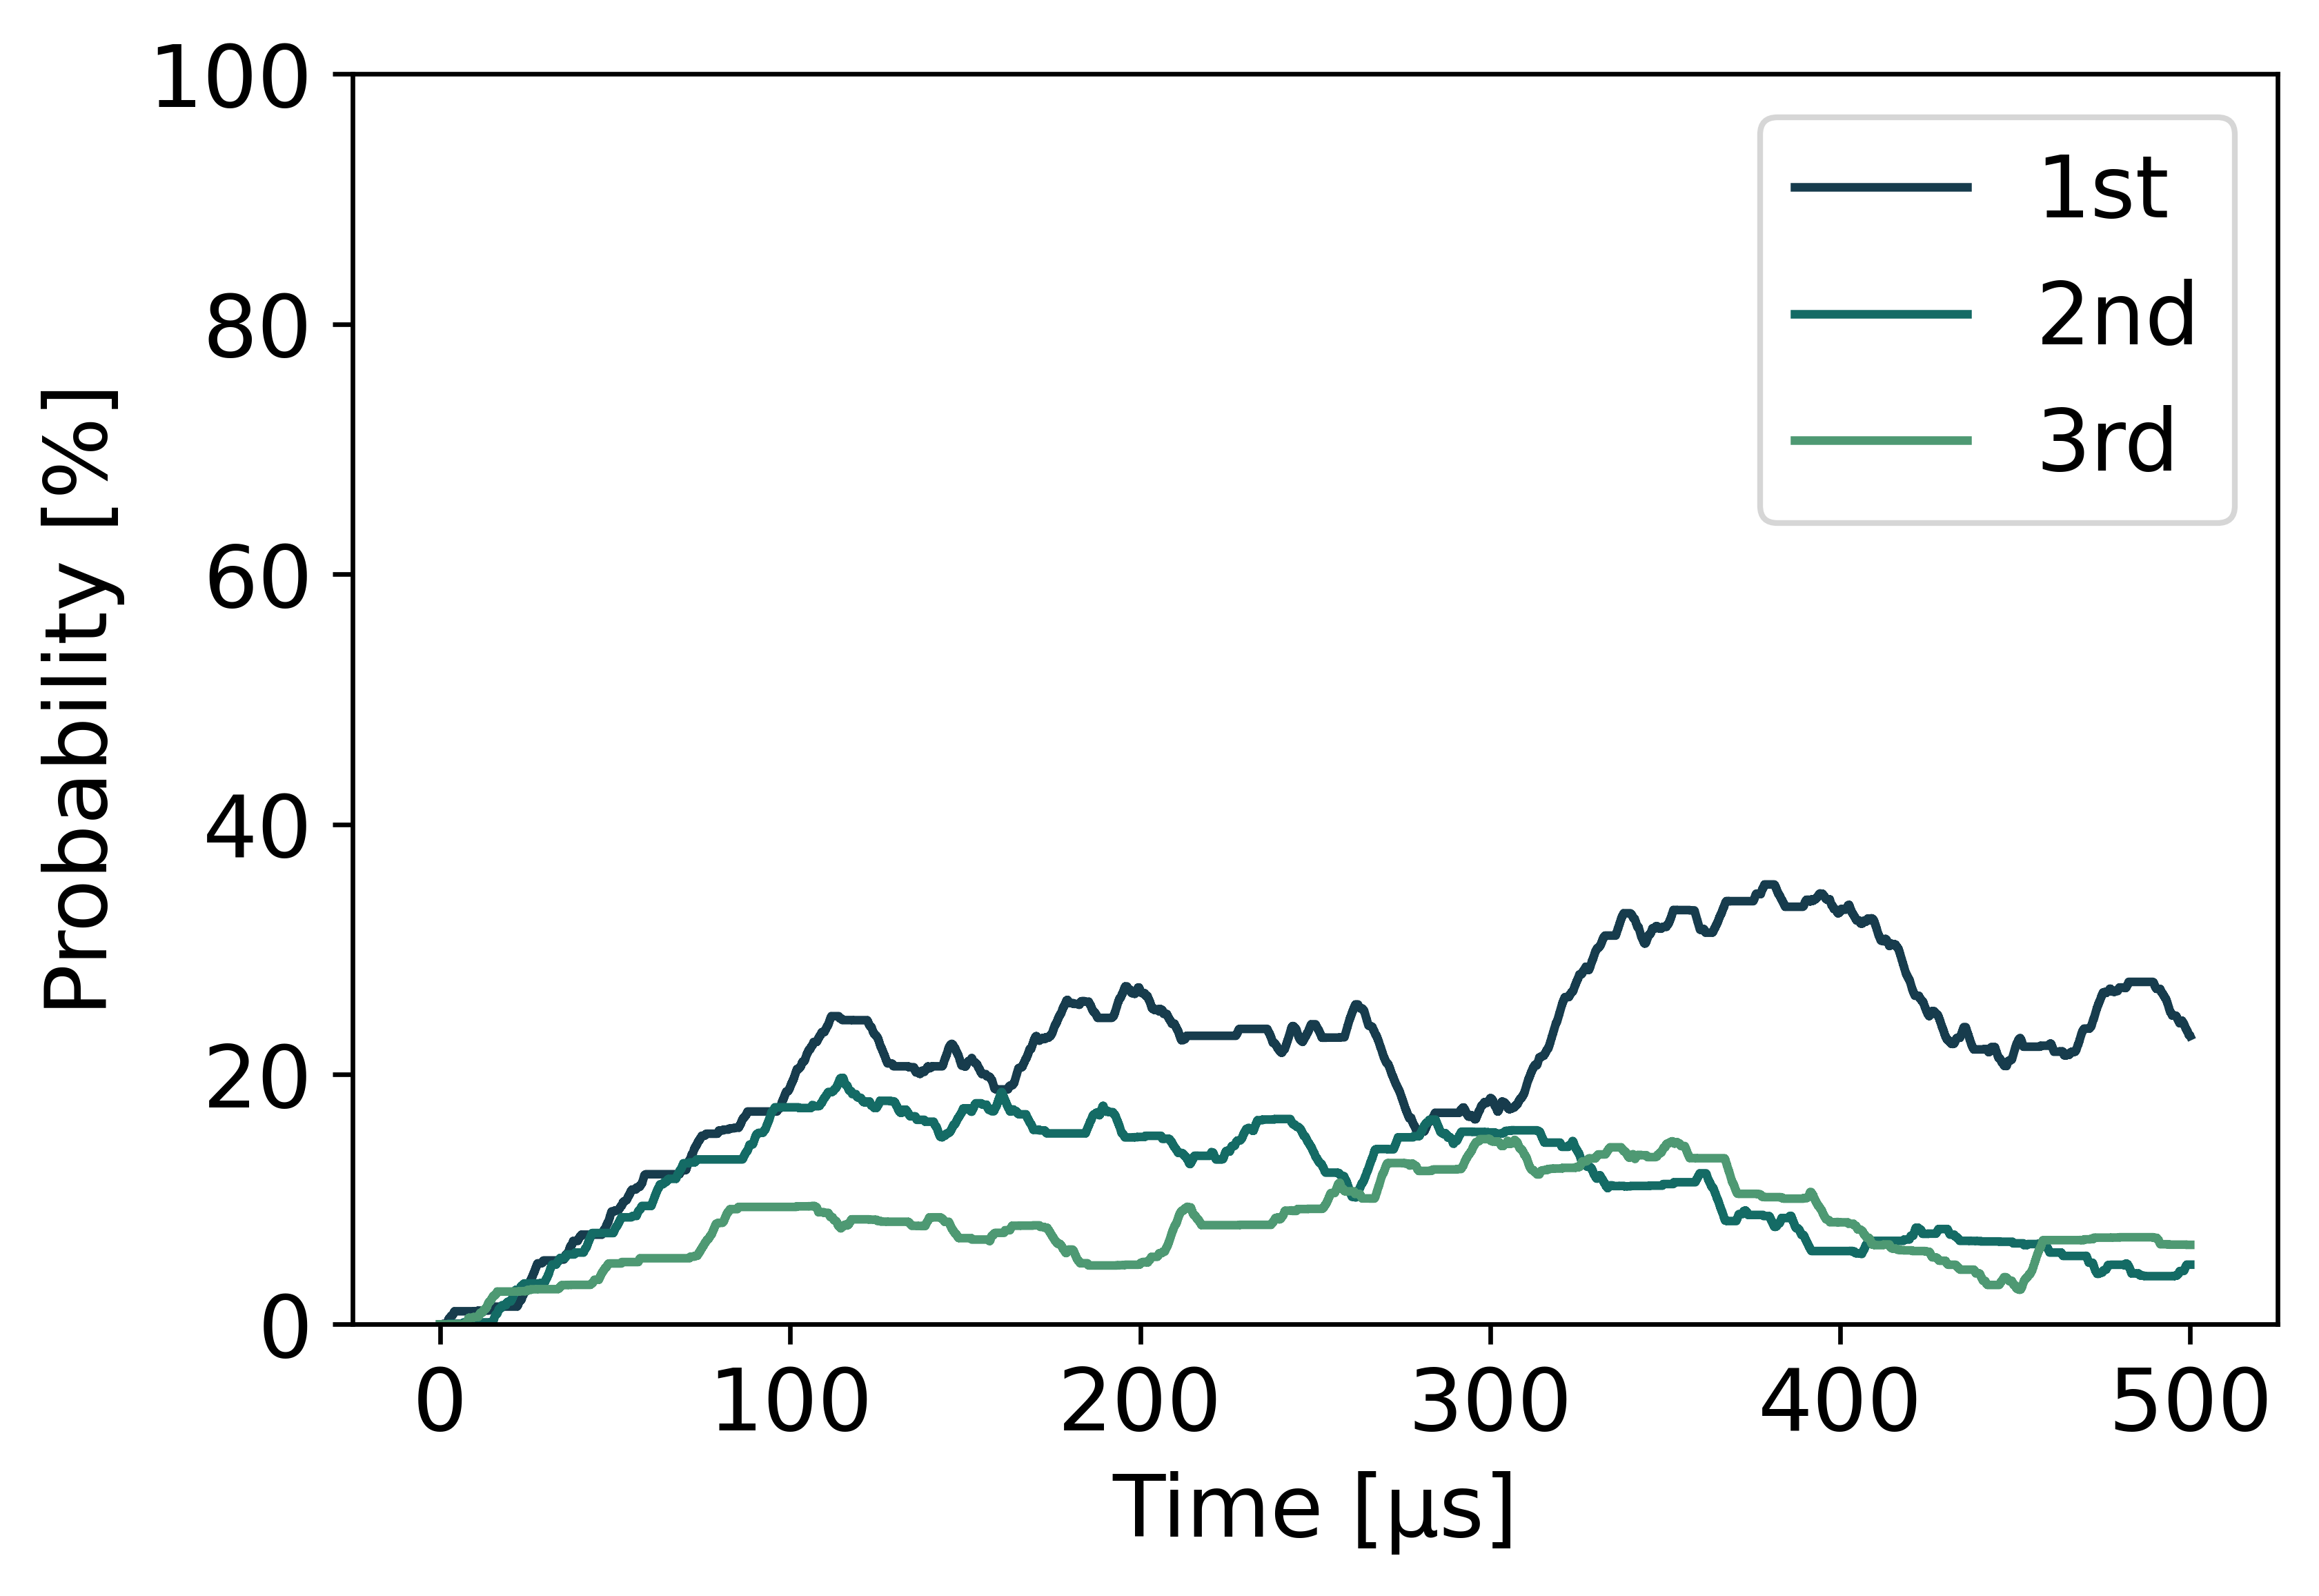

In [16]:
window = 12500
binary = "Example_dataset/TOPO0/Conformer_population/COLVAR_binary"

plot.convergence(binary,window)